# Исследование закономерностей определяющих успешность игры:

В нашем распоряжении данные приложения интернет-магазина «Стримчик»: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), который продаёт по всему миру компьютерные игры.  Нашей конечной целью является поиск точек роста интернет-магазина: выявление определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Полезные цели исследования(для заказчика):**

1) Составление портрета пользователя каждого региона:

- Самые популярные платформы (топ-5). Описание различий в долях продаж.

- Самые популярные жанры (топ-5). С пояснением разницы.

- Влияние рейтинга ESRB на продажи в отдельном регионе.

2) Проверка гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

3) Поиск и конкретизация закономерностей определяющих успешность игры(в выводе).

**Ход исследования:**

Для начала работы получим данные из CSV-файла. Неизвестно в этом датефрейме качество данных, поэтому необходимо перед началом анализа провести необходимый обзор данных. Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки по возможности исправлю данные ошибки, не исказив конечный результат исследования. Создадим новые столбцы для внесения конкретики, затем приступим к исследованию. После приступим к статистическому анализу: проверим гипотезы. Сделаем общий вывод: найдём точки роста для бизнеса/заказчика(ценовые/неценовые).

Таким образом, моё исследование пройдёт в 7 этапов:

- Обзор данных.

- Подготовка данных/Предобработка данных.

- Исследовательский анализ данных.

- Составление портрета пользователя каждого региона.

- Проверка гипотез.

- Подведение итогов работы: поиск и конкретизация закономерностей определяющих успешность игры.

# Документация:

![image.png](Документация_сборный_проект_1.jpg)

#### Загрузка данных:

- импорт необходимых библиотек;

- чтение CSV-файла и запись в переменную;

- вывод первых строк для проверки целостности и первичного ознакомления;

- выводим первичную информацию о датафрейме;

- проверяем требования соблюдения единого стиля;

- найдём процентное соотношение пропусков(если они есть);

- просмотр описательных статистик;

- постройка графиков(гистограмм);

- промежуточный итог: внесения конкретизации по объёму работы.

*Путь к файлу: /datasets/games.csv*

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

import numpy as np

import warnings
warnings.filterwarnings("ignore")

Записываем в переменную наш датафрейм:

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv', sep=',')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep='\t')

# P.S Можно не указывать необязательный параметр разделителя в CSV если sep=',' !

Выводим первые 20 строчек датафреймов на экран для проверки правильности чтения файлов и частичного ознакомления:

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Данные были считаны корректно: с первого взгляда столбцы хранят значения согласно документации, т.е. всё считано верно. Согласованность единиц измерения с документацией выявим позже.

Выводим основную информацию о датафрейме с помощью метода info():


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В нашей таблице присутствуют пропуски, названия атрибутов НЕ соблюдают все требования единого стиля:

Соблюдено:

- +на одном(английском языке);

- +названия адекватно отражают сущность записей;

- +snake-case;

НЕ соблюдено:

- записи в нижним/верхнем регистре

- приемлемый тип данных подобран для каждого столбца(атрибута)

Найдём процентое соотношение пропусков в каждом атрибуте ко всему количеству полей атрибута:

In [5]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


В 4-х атрибутах имеются пропуски: в 3-х довольно много Nan-значений(от 40% до 51%), в 1-м - 2%. На следующем этапе поработаем с ними.

Таблица имеет количественные(численные) переменные, выведем первичные описательные статистики:

In [6]:
df.describe().T
# метод '.T' - транспортирует(меняет местамит наименования столбцов и базовых статистик)
# полезный метод условии наличия большого количества атрибутов в таблице

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


В таблице с данными о поездках явных аномалий на этапе ознакомления не видно.

Построю графики для атрибутов датафрейма с целью первичного ознакомления(позже раскроим их более подробно при необходимости):

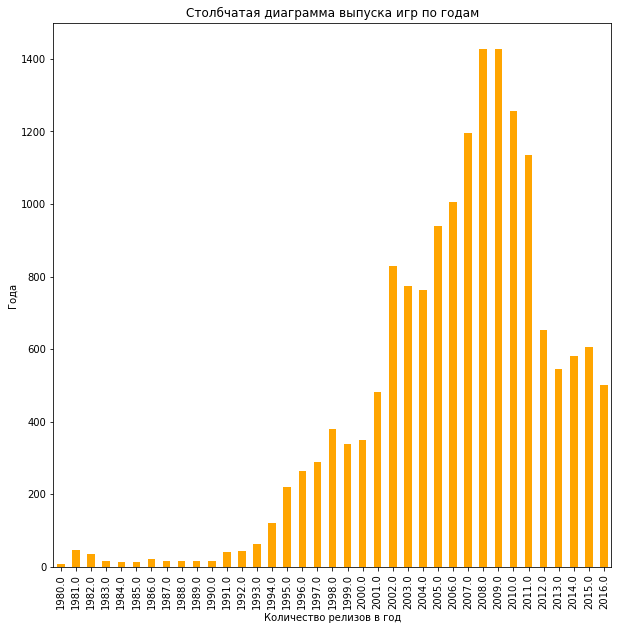

In [7]:
df['Year_of_Release'].value_counts().sort_index(ascending=True).plot.bar(figsize=(10, 10), color='orange')
plt.xlabel('Количество релизов в год')
plt.ylabel('Года')
plt.title('Столбчатая диаграмма выпуска игр по годам')
plt.show()

На гистограмме видно что примерно с 1990 года начинатется рост релизов и тенденция к росту сохраняется примерно до 2011-2012 годов, правда тенденция не совсем линейная. С 2011-2012 года до 2014-го на гистограмме виден спад релизов, 2015 на промежутке 4-5 лет демонстрирует начало роста.

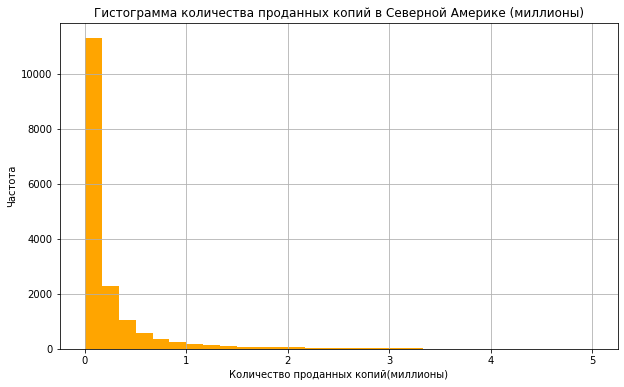

In [8]:
df['NA_sales'].hist(figsize=(10, 6), color='orange', legend=False, grid=True, bins=30, range=(0, 5))
plt.xlabel('Количество проданных копий(миллионы)')
plt.ylabel('Частота')
plt.title('Гистограмма количества проданных копий в Северной Америке (миллионы)')
plt.show()

Из метода describe() мы узнали что есть игра которая продана в количестве почти 42 миллиона копий. Видим на гистограмме что такой случай крайне большая редкость: большинство релизов имеют количество проданных копий до 1-го миллиона копий(3-ий квартиль = 0.24 млн.).

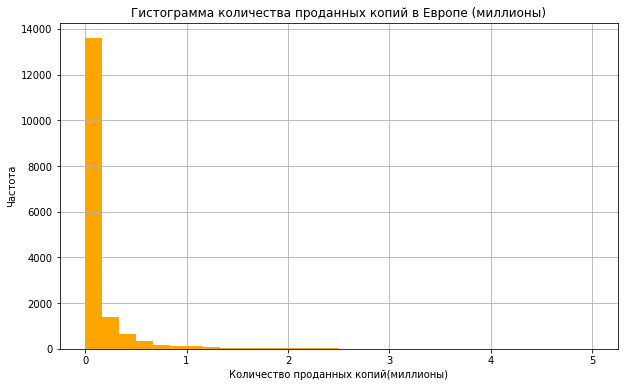

In [9]:
df['EU_sales'].hist(figsize=(10, 6), color='orange', grid=True, bins=30, range=(0, 5))
plt.xlabel('Количество проданных копий(миллионы)')
plt.ylabel('Частота')
plt.title('Гистограмма количества проданных копий в Европе (миллионы)')
plt.show()

Схожая ситуация с предыдущим графиком: большинство релизов имеют количество проданных копий до 1-го миллиона копий(3-ий квартиль = 0.11 млн., максимальное значение = 29 млн. проданных копий). Если опираться на первичные описательные статитстики, то можно предположить что в Северной Америке покупают игры чаще чем в Европе.

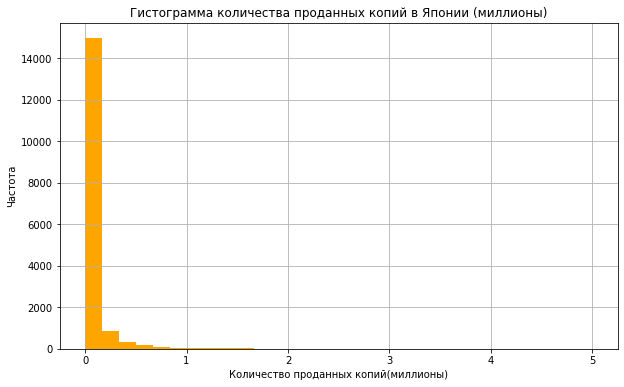

In [10]:
df['JP_sales'].hist(figsize=(10, 6), color='orange', grid=True, bins=30, range=(0, 5))
plt.xlabel('Количество проданных копий(миллионы)')
plt.ylabel('Частота')
plt.title('Гистограмма количества проданных копий в Японии (миллионы)')
plt.show()

Аналогично, но значение описательных статистик ещё меньше(3-ий квартиль = 0.04 млн., максимальное значение = почти 11 млн. проданных копий).

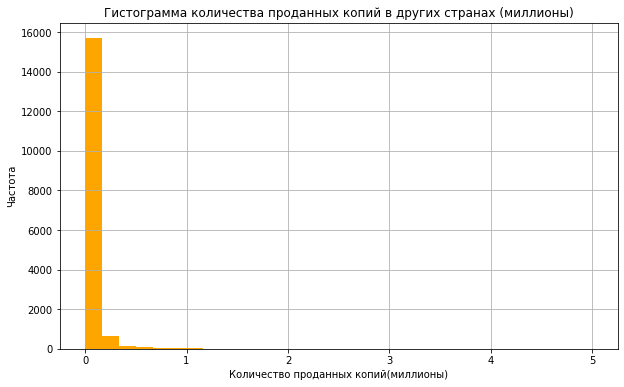

In [11]:
df['Other_sales'].hist(figsize=(10, 6), color='orange', grid=True, bins=30, range=(0, 5))
plt.xlabel('Количество проданных копий(миллионы)')
plt.ylabel('Частота')
plt.title('Гистограмма количества проданных копий в других странах (миллионы)')
plt.show()

Аналогично. Знаковые значение описательных статистик: 3-ий квартиль = 0.03 млн., максимальное значение = почти 11 млн. проданных копий.

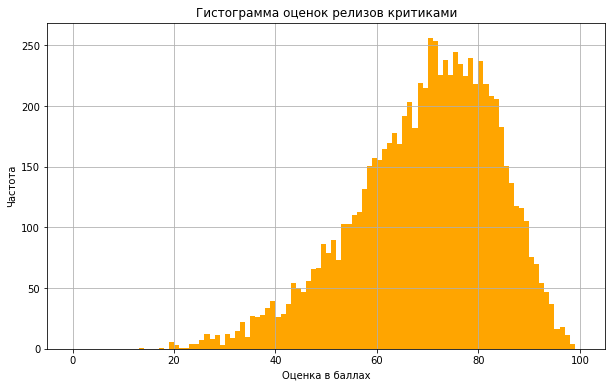

In [12]:
df['Critic_Score'].hist(figsize=(10, 6), color='orange', grid=True, bins=100, range=(0, 100))
plt.xlabel('Оценка в баллах')
plt.ylabel('Частота')
plt.title('Гистограмма оценок релизов критиками')
plt.show()

Несимметричный колокообразный график, напоминающий нормальное распределение, где основная часть данных лежит примерно в пределах оценки от 40 до 90.

*После первичного ознакомление с датасетом однозначно можно сказать, что набор данных имеет  некоторые проблемы: не все атрибуты имеют корректный тип данных(из-за этого для столбца 'User_Score' нельзя расчитать описательные статистики), не все пункты оформления по единому стилю соблюдены(разные регистры), имеются пропуски. Распределения числовых атрибутов вполне адекватные. Объём для предобработки не особо велик: нужно поработать с дубликатами(явными/неявными), поработать с пропусками, подправить названия атрибутов согласно правил единого стиля, поменять тип данных в некоторых столбцах и добавить конкретизующие столбцы(опционально), посмотреть зависимости столбцов(возможно будет найти не очень очевидные аномалии).*

#### Предобработка данных/Подготовка данных:

- фиксация количества данных;

- замена названий столбцов;

- работа с пропусками;

- измение типов данных в некоторых атрибутах;

- проверка наличия явных/неявных дубликатов и их устранение(при наличии);

- просмотр потери данных.

Для начала зафиксируем количество записей в таблице, чтобы установить процент потерянных данных после предобработки.

In [13]:
df_start_len = len(df)
df_start_len

16715

Узнаем за какой период у  нас данные - выведем размах дат поездок:

In [14]:
# Прописываю print чтобы не было кавычек
print(f" Данные в датафрейме имеют диапозон дат: от {df['Year_of_Release'].min()} до {df['Year_of_Release'].max()}")

 Данные в датафрейме имеют диапозон дат: от 1980.0 до 2016.0


Замените названия столбцов (приведите к нижнему регистру):

Приведём названия атрибутов к единому стилю:

In [15]:
# Можно через метод rename(), но в нашем случае нужно только привести нижнему регистру
# df.columns = [col.lower() for col in df.columns]
df.columns = df.columns.str.lower()

Проверим корректность выполнения:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Название столбцов корректно изменины согласно требованиям едингого стиля.

Обработайте пропуски при необходимости:

Для того чтобы изменить тип данных в некоторых необходимо для начала избавиться от пропусков:

Поработаем со столбцом "year_of_release". Найдём количество пропусков.

In [17]:
df.query('year_of_release.isnull()')['name'].count()

269

Выведем случайную выборку из 20-и записей, где пропущен год выпуска:

In [18]:
df.query('year_of_release.isnull()').sample(n=20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5070,The Golden Compass,PSP,NaN,Action,0.11,0.16,0.00,0.10,28.0,4.1,E10+
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
14449,Fullmetal Alchemist: Brotherhood,PSP,NaN,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14126,Housekeeping,DS,NaN,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13142,GRID,DS,NaN,Racing,0.04,0.00,0.00,0.00,79.0,8.1,E
5624,Singularity,X360,NaN,Shooter,0.24,0.05,0.00,0.02,76.0,7.7,M
5932,Shrek the Third,DS,NaN,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
2281,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,tbd,E
1699,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M
15998,Jet Impulse,DS,NaN,Simulation,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Оптимальный вариант для заполнения пропусков следующий: т.к. в названиях игр в некоторых случаях фигурирует год, то можно написать функцию которая будет копировать этот год в атрибут с годом релиза, но не всегда год в названии является годом релиза, но всё же в большинстве случаев это так. Поэтому функция будет включать только возможные года релиза согласно набору данных. В случае если после испольвании функции останется немного пропусков можно будет узнать год релиза из открытых источников(маловероято).

In [19]:
def copy_year(row):
    name = row['name']
    year_of_release = row['year_of_release']
    years = list(range(1980, 2017))
    if pd.isnull(year_of_release):  # Проверяем, если год релиза отсутствует
        for year in years:
            if str(year) in name:  # Проверяем, если год встречается в названии
                return year
    return year_of_release  # Возвращаем год релиза (или NaN, если ничего не нашли)

In [20]:
df['year_of_release'] = df.apply(copy_year, axis=1)

Взглянем на обновлённое количество пропусков.

In [21]:
df.query('year_of_release.isnull()')['name'].count()

252

16 пропусков мы смогли устранить. Искать дату релиза по открытым источникам довольно долго и нецелесообразно, поэтому посмотрим на небольшую выборку строк с пропусками: может найдём какой-то намёк на ошибку сбора данных или какую-то закономерность которая поможет нам решить проблему и взглянем на описательные статистики этого набора. Решим проблему самым оптимальным путём(с точки зрения времени и необходимости сохранения данных).

In [22]:
df.query('year_of_release.isnull()').sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13142,GRID,DS,NaN,Racing,0.04,0.00,0.00,0.00,79.0,8.1,E
15292,Steal Princess,DS,NaN,Platform,0.02,0.00,0.00,0.00,60.0,tbd,E10+
12235,National Geographic Challenge!,X360,NaN,Misc,0.06,0.00,0.00,0.00,NaN,NaN,NaN
8680,Jurassic Park: The Game,X360,NaN,Action,0.15,0.00,0.00,0.01,60.0,3.6,T
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN
11000,Demon Chaos,PS2,NaN,Action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
3704,Def Jam: Fight for NY,XB,NaN,Fighting,0.43,0.10,0.00,0.02,84.0,8.5,M
11954,Dead Island: Riptide,PC,NaN,Action,0.00,0.07,0.00,0.01,61.0,6,M
4635,NHL Slapshot,Wii,NaN,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E


In [23]:
df.query('year_of_release.isnull()').describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,252.000000,252.000000,252.000000,252.000000,142.000000
mean,NaN,0.200278,0.076627,0.025198,0.025595,66.971831
std,NaN,0.342542,0.144294,0.091784,0.050740,14.560679
min,NaN,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaN,0.010000,0.000000,0.000000,0.000000,56.250000
50%,NaN,0.085000,0.015000,0.000000,0.010000,69.500000
75%,NaN,0.232500,0.090000,0.000000,0.030000,77.000000
max,NaN,2.360000,0.970000,0.770000,0.350000,92.000000


In [24]:
print(f'{round(df.query("year_of_release.isnull()")["name"].count() / len(df) * 100, 2)}% - доля пропусков')

1.51% - доля пропусков


Провели небольшое ознакомление. Единственное что бросается в глаза - год отсутствует в релизах, где продажи копий не особо высокие(до 0.5 млн. копий), хотя эта особенность справедлива ко всем записям, поэтому каких-то уникальных зависимостей не видно на выборке и на таблице с описательными статистиками, т.е. маловероятно что это ошибочно собранные данные, а значит избавляться от них не стоило бы, но сделать мы врятле что-то можем. Мы попытались поискать возможности для восстановления(немного годов релизов восстановили), проверили долю таких записей:  их немного, поэтому  удалим их, т.к. удаление такой небольшой доли не должен значительно изменить результат исследования.

In [25]:
df = df.dropna(subset=['year_of_release'])

In [26]:
df['year_of_release'].isna().sum()

0

Избавились от пропусков в данном столбце.

Осталось поработать ещё с 3-мя атрибутами: 'critic_score', 'user_score', 'rating'. Т.к. у нас атрибуты с пропусками являются числовыми(количественными), то мы можем построить диаграммы рассеивания и узнать коэффицент Пирсона(коэффицент корреляции). По коэффиценту Пирсона найдём наиболее зависимые друг от друга столбцы и  восстановим пропуски приблеженными к реальным значениями(при условии что хотя бы один коэффицент будет близок к единице(или минус единице)).

Построим матрицу диаграмм рассеяния чтобы визуально прикинуть где есть смысл строить отдельный график и искать коэффицент Пирсона:

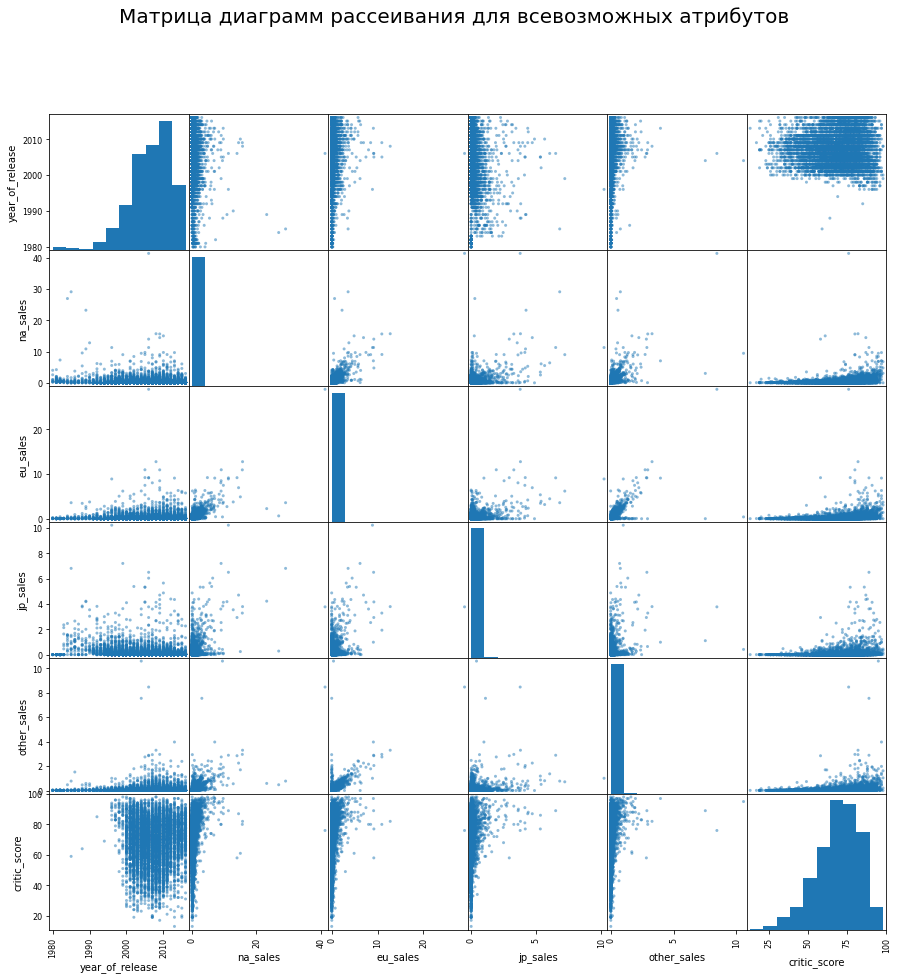

In [27]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.suptitle('Матрица диаграмм рассеивания для всевозможных атрибутов', fontsize=20)
plt.show()

Из матрицы диаграмм рассеяния видим следующее: корреляция столбца 'critic_score'прослеживается со всеми столбцами продаж: Северная Америка, Европа, Япония, другие страны. Найдём коэффиценты Пирсона для отношения столбца 'critic_score' с столбцами продаж: 

- Коэффицент Пирсона для столбцов оценки критиков и продаж в Северной Америки:

In [28]:
df['critic_score'].corr(df['na_sales'])

0.24069356991623678

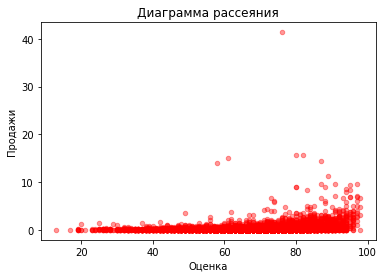

In [29]:
df.plot(x='critic_score', y='na_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

- Коэффицент Пирсона для столбцов оценки критиков и продаж в Европе:

In [30]:
df['critic_score'].corr(df['eu_sales'])

0.22140040391116547

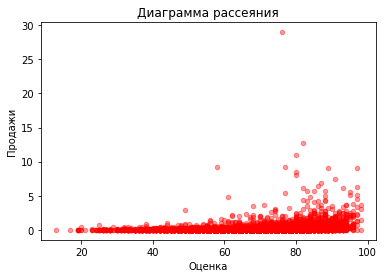

In [31]:
df.plot(x='critic_score', y='eu_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

- Коэффицент Пирсона для столбцов оценки критиков и продаж в Японии:

In [32]:
df['critic_score'].corr(df['jp_sales'])

0.1531943728276692

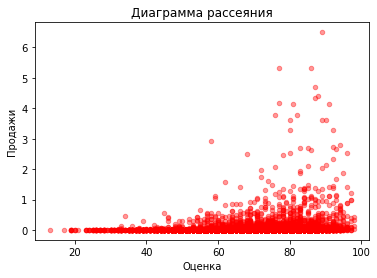

In [33]:
df.plot(x='critic_score', y='jp_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

- Коэффицент Пирсона для столбцов оценки критиков и продаж в других странах:

In [34]:
df['critic_score'].corr(df['other_sales'])

0.19891386212861686

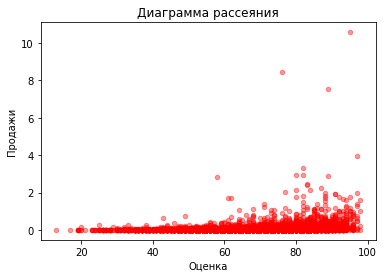

In [35]:
df.plot(x='critic_score', y='other_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

Ни один коэффицент не показал явную зависимость.

Добавим столбец суммарных продаж:

In [36]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [37]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16463 non-null  object 
 2   year_of_release  16463 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16463 non-null  float64
 5   eu_sales         16463 non-null  float64
 6   jp_sales         16463 non-null  float64
 7   other_sales      16463 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       9851 non-null   object 
 10  rating           9779 non-null   object 
 11  all_sales        16463 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


Добавление прошло успешно. Посмотрим диаграмму рессеяния для этого столбца со столбцом 'critic_score' и найдём коэффицент Пирсона.

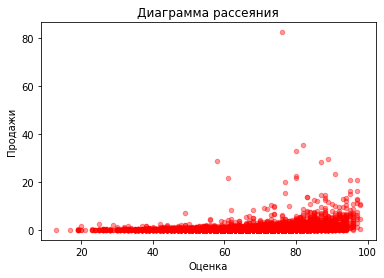

In [39]:
df.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

In [40]:
df['critic_score'].corr(df['all_sales'])

0.24580116071171448

Будет не правильно если мы попробуем восстановить пропуски в 'critic_score' по другим столбцам(корреляция слабая), но такие записи не должны пропасть т.к. выручку и цифры продаж они принесли. Заполним пропуски значениями, которые демонстрируют пропуск и при этом не мешают преобразованию типа атрибута. Нам так необходимо сделать, ведь установить настоящую природу пропусков не представляется возможным: это неслучайные пропуски. После измения типа данных мы ещё попробуем найти коэффиценты Пирсона(возможно хоть где-то можно произвести замену примерными значениями).

In [41]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [42]:
df['user_score'] = df['user_score'].fillna(-1)

![image.png](воз_рейтинг.jpg)

Система ESBR характерна только для 3-х регионов: США, Мексика и Канада. Пропуски с рейтингом говорят о том что в данном регионе рейтинга ESBR не существует, поэтому поставим следующую заглушку: 

In [43]:
df['rating'] = df['rating'].fillna('is not defined')

Взглянем на записи с пропусками в столбце 'name':

In [44]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,is not defined,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,is not defined,0.03


В данных записях много пропусков, а их количество не велико, поэтому удалим их.

In [45]:
df = df.dropna(subset=['name'])

In [46]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
all_sales          0
dtype: int64

Избавились от пропусков сразу в двух атрибутах.

Проверим изменения:

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  float64
 9   user_score       16461 non-null  object 
 10  rating           16461 non-null  object 
 11  all_sales        16461 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


In [48]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


Мы преобразовали пропуски в значения которые показывают пропуск, но не препятствуют изменению типа данных для корректного выполнения методов.

Преобразуем атрибуты к правильному типу данных(для того чтобы все возможности библиотек были доступны):

In [49]:
df.loc[:, 'year_of_release'] = df['year_of_release'].astype('int')

In [50]:
df.loc[:, 'critic_score'] = df['critic_score'].astype('int')

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать.

В 'user_score' есть значение tbd, которое мешает преобразованию типа, поэтому посмотрим на такие записи для определения дальнейших действий:

In [51]:
df.query('user_score == "tbd"').sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
11508,Princess in Love,DS,2009,Simulation,0.07,0.00,0.00,0.01,-1,tbd,E,0.08
8237,Professional Fisherman's Tour: Northern Hemisp...,DS,2007,Sports,0.16,0.00,0.00,0.01,-1,tbd,E,0.17
9084,Pipe Mania,PS2,2008,Puzzle,0.07,0.05,0.00,0.02,68,tbd,E,0.14
15861,My Ballet Studio,DS,2009,Simulation,0.01,0.00,0.00,0.00,-1,tbd,E,0.01
5639,Rock Band Country Track Pack,PS2,2009,Misc,0.16,0.12,0.00,0.04,-1,tbd,E10+,0.32
9297,Spider-Man: Edge of Time,DS,2011,Action,0.12,0.01,0.00,0.01,50,tbd,E10+,0.14
6309,Wave Rally,PS2,2001,Racing,0.13,0.10,0.00,0.03,62,tbd,E,0.26
12445,A-Train: City Simulator,3DS,2014,Simulation,0.00,0.00,0.06,0.00,65,tbd,E10+,0.06
8451,ZhuZhu Puppies,DS,2011,Simulation,0.12,0.03,0.00,0.01,-1,tbd,E,0.16
5035,Iron Man 2,PSP,2010,Action,0.18,0.12,0.00,0.07,49,tbd,T,0.37


Значение 'tbd' что-то да означает, но явной причины использования в таблице не видно, поэтому заменим его на '-1' т. к. мешает преобразованию к новому корректному типу.

In [52]:
df.loc[df.loc[:, 'user_score'] == 'tbd', 'user_score'] = -1

In [53]:
df.loc[:, 'user_score'] = df['user_score'].astype('float')

Проверим изменения:

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     16461 non-null  int64  
 9   user_score       16461 non-null  float64
 10  rating           16461 non-null  object 
 11  all_sales        16461 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.6+ MB


Теперь переведём все записи в нижний регистр для претовращения путаницы и более простого ввода:

In [55]:
df.loc[:, 'name'] = df['name'].str.lower()
df.loc[:, 'platform'] = df['platform'].str.lower()
df.loc[:, 'genre'] = df['genre'].str.lower()
df.loc[:, 'rating'] = df['rating'].str.lower()

Проверим изменения:

In [56]:
df.sample(n=20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
12813,caligula,psv,2016,role-playing,0.00,0.00,0.06,0.00,-1,-1.0,is not defined,0.06
4376,discovery kids: kitten corner,ds,2009,simulation,0.42,0.00,0.00,0.03,-1,-1.0,e,0.45
7145,momotarou dentetsu 15,ps2,2005,misc,0.00,0.00,0.22,0.00,-1,-1.0,is not defined,0.22
5006,locoroco,psp,2006,platform,0.14,0.04,0.16,0.03,83,8.7,e,0.37
2442,ratatouille,ps2,2007,action,0.31,0.00,0.00,0.53,65,8.0,e,0.84
7318,college hoops 2k7,x360,2006,sports,0.20,0.00,0.00,0.02,82,8.2,e,0.22
6959,harry potter and the goblet of fire,xb,2005,action,0.18,0.05,0.00,0.01,68,5.8,e10+,0.24
1444,disney princess: enchanted journey,wii,2007,adventure,1.22,0.03,0.00,0.09,-1,4.3,e,1.34
5615,fifa 2001 major league soccer,ps,2000,sports,0.18,0.12,0.00,0.02,85,7.8,e,0.32
1370,gran turismo 4 prologue,ps2,2003,racing,0.00,0.47,0.77,0.17,-1,-1.0,is not defined,1.41


Все изменения проведены корректно.

Проверим наличие явныхдубликатов в датафрейме.

In [57]:
df.duplicated().sum()

0

Явных дубликатов нет.

Проверим наличие дублирования в категориальных столбцах(где уникальных значений не так много): возможно есть одна и та же платформа/жанр который указан(а) на разных языках или в одном случае присутствует опечатка и объединим их при наличии:

In [58]:
df['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [59]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Проверим наличие неявных дубликатов по трём основным столбцам(имени, платформе и году релиза) и удалим их если они есть.

In [60]:
duplicates_count = df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print("Количество дубликатов:", duplicates_count)

Количество дубликатов: 1


In [61]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
df = df.reset_index(drop=True)

In [62]:
duplicates_count = df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print("Количество дубликатов:", duplicates_count)

Количество дубликатов: 0


Возможные причины появления пропусков в исходных данных:

- ошибка в чтении значений могла привести к потере целостности данных что вследствии привело к возникновению пропусков;
- при обработке данных предыдущее значение могло не подойти под критерии(функции или цикла) и был создан пропуск;
- умышленные(допустимые) пропуски: может игру определяли к разным жанрам и в итоге не указали ни один или информация о пользовательском('критик') ретинге была не доступна в момент сбора данных;
- проблемы с выгрузкой из базы данных;
- повреждённый читаемый файл;
- пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки;
- игра могла получить региональный возрастной рейтинг, а не северо-американский ESRB;
- другие.

Подведём промежуточный итог(итог предобработки): Нам удалось получить большее понимание о наших данных(узнали временной диапозон сбора данных, узнали о рейтинге ESRB, узнали о корреляции некоторых столбцов и т.д.), избавиться от некоторого количества ошибочных(аномальных) записей, немного восстановить пропуски в датасете, проверить наличие и устранить(при наличии) неявные дубликаты, проверить наличие явных дубликатов, внести больше конкретики и понимания для каждого столбца датафрейма и подкорректировать типы данных. Доля остаточных(относительно чистых) данных , обновлённые типы данных, количество пропусков в каждом атрибуте приведены ниже:

In [63]:
print(f'Процент остаточных данных в датафрейме = {len(df) / df_start_len * 100}')

Процент остаточных данных в датафрейме = 98.47442416990727


Потеряли примерно 1.5%.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  int64  
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
 11  all_sales        16460 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Более детальная информация о датафрейме:

In [65]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
for col_l in list_c:
    print('-' * 50)
    print(f'Атрибут "{col_l}" хранит следующие уникальные значения: {temp[col_l].sort_values().unique()}')
    print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

--------------------------------------------------
Атрибут "name" хранит следующие уникальные значения: [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
--------------------------------------------------
Атрибут "platform" хранит следующие уникальные значения: ['2600' '3do' '3ds' 'dc' 'ds' 'gb' 'gba' 'gc' 'gen' 'gg' 'n64' 'nes' 'ng'
 'pc' 'pcfx' 'ps' 'ps2' 'ps3' 'ps4' 'psp' 'psv' 'sat' 'scd' 'snes' 'tg16'
 'wii' 'wiiu' 'ws' 'x360' 'xb' 'xone']
platform : кол-во NaN 0 , процент NaN 0.0 %
--------------------------------------------------
Атрибут "year_of_release" хранит следующие уникальные значения: [1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]
year_of_release : кол-во NaN 0 , процент NaN 0.0 %
---

На этом этап подготовки данных исчерпан.

In [66]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16460 non-null  object 
 1   platform         16460 non-null  object 
 2   year_of_release  16460 non-null  int64  
 3   genre            16460 non-null  object 
 4   na_sales         16460 non-null  float64
 5   eu_sales         16460 non-null  float64
 6   jp_sales         16460 non-null  float64
 7   other_sales      16460 non-null  float64
 8   critic_score     16460 non-null  int64  
 9   user_score       16460 non-null  float64
 10  rating           16460 non-null  object 
 11  all_sales        16460 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

#### Исследовательский анализ данных:

- подсчёт количетсва игр за разные периоды;

-  динамика изменения продаж по платформам;

- поиск актуального периода для построения прогноза на 2017-й год;

-  выявление ряда наиболее прибыльных платформ;

- построение ящиков с усами и интерпритация выводов по ним;

- исследование влиения пользователей и критиков на продажи;

- построение общего распределение игр по жанрам;

Подсчёт количетсва игр за разные периоды:

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Для большей наглядности построим 2 графика распределение выхода игр: отсортированный по годам, отсортированный по количеству выпущенных игр.

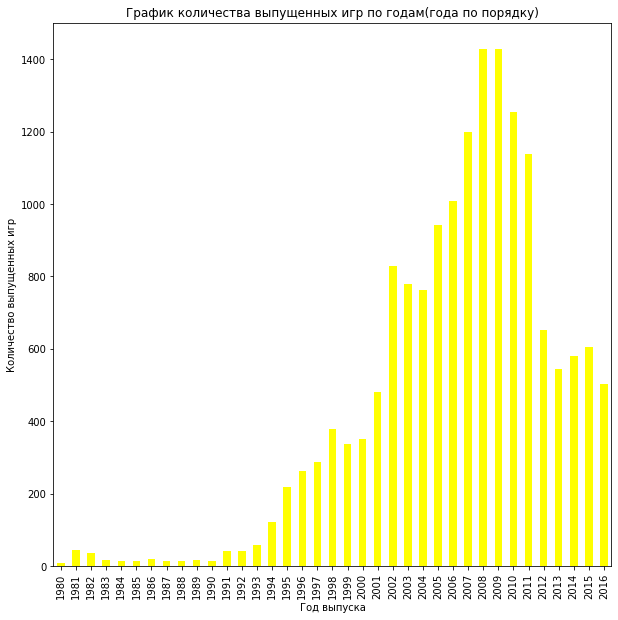

In [67]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', color='yellow', figsize=(10, 10), legend=False)
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('График количества выпущенных игр по годам(года по порядку)')
plt.show()

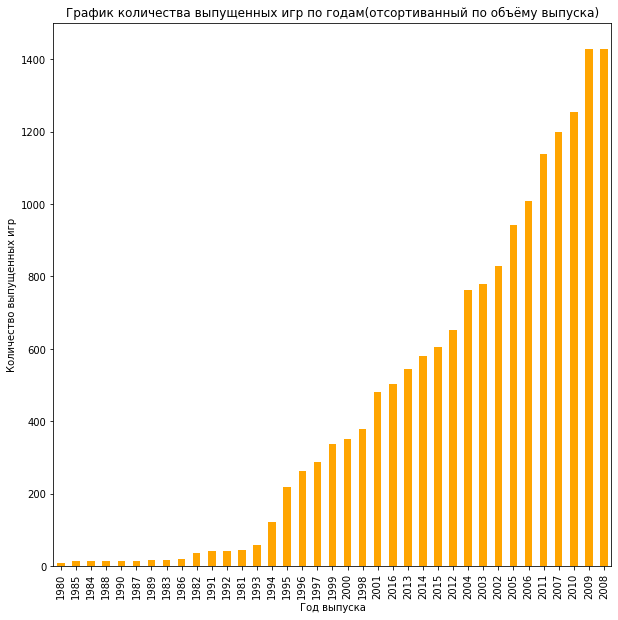

In [68]:
df['year_of_release'].value_counts(ascending=True).plot(kind='bar', color='orange', figsize=(10, 10))
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.title('График количества выпущенных игр по годам(отсортиванный по объёму выпуска)')
plt.show()

Пиковое количество релизов приходится на 2008-й год, за ним идёт 2009, 2010, 2011 и т.д.. Интересно что только с 1993-го года объём релизов начал расти: видимо люди до этого времени не были заинтересованы в создании и выпуске игр. Объёмы выпуска с 1994-го года увеличились почти в 2 раза. Опираясь на данные графики можно сказать что 1994-й год стал отправной точкой в геймдеве. Важны ли данные за все периоды? Чем больше выборка, чем она репрезентативнее: если есть возможность взять выборку побольше, то берём выборку больше. Но определённо 'ценность' данных после 1994-го года(или даже после 2001-го) гораздо выше чем до 1994-го, т.к. объёмы выпуска после 1994-го в разы больше(в основном) чем до 1994-го. После 2000-го года объёмы релизов начинают расти ещё стремительнее: таким образом самые 'ценные' данные наблюдаются после 2000-го года, ведь после 2000-го объёмы гораздо выше. После 2010-го года наблюдается спад релизов вплоть до 2016-й. Причины спада могут быть разными и наверное даже комплексными: развитие мобильного гейминга, циклический спад желания инвесторов вкладывать в разработку новых проектов и другие.

Динамика изменения продаж по платформам:

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Посмотрим количество наблюдаемых платформ.

In [69]:
len(df['platform'].unique())

31

Строить 31-у прямую на одном графике слишком не показательно: решение - декомпозировать. 1-й вариант:Парцелируем платформы по значимости для бизнеса: первый график содержит топ-10 наиболее прибыльных платформ, второй: 11-20 места, третий 21-31. 2-й вариант: построить отдельный график для каждой платформы. Пойдём по 2-му варианту, т.к. он является наиболее показательным и легко реализуется с помощью цикла.

Составим рейтинг таблицу платформ по прибыльности:

In [70]:
platform_rating = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index()
platform_rating.style.background_gradient('viridis')

,platform,all_sales
0,ps2,1247.280000
1,x360,961.300000
2,ps3,931.330000
3,wii,891.180000
4,ds,802.790000
5,ps,727.580000
6,ps4,314.140000
7,gba,312.880000
8,psp,290.340000
9,3ds,257.810000


In [71]:
# Установим платформы в качестве индексов т.к. так мы сможем отобразить названия платформ на графике
platform_rating.set_index('platform', inplace=True)

Построим столбачтую диаграмму по сводной таблице для более наглядного представления:

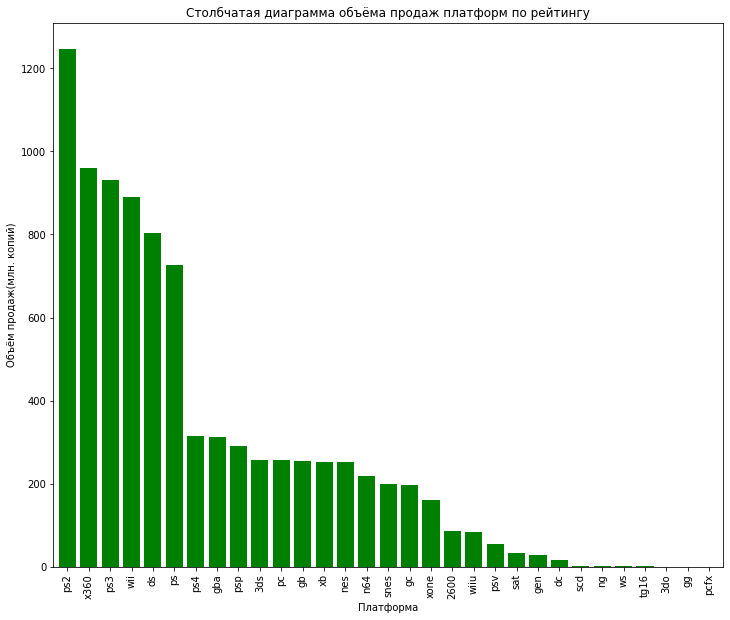

In [72]:
# Строим столбчатую диаграмму
platform_rating.plot.bar(xlabel= 'Платформа', ylabel= 'Объём продаж(млн. копий)', figsize=(12, 10), color='green', width=0.8, legend=False)
plt.title('Столбчатая диаграмма объёма продаж платформ по рейтингу')
plt.show()

In [73]:
# Сбросим индекс и вернем его к исходному состоянию
platform_rating.reset_index(inplace=True)

Запишем названия в платформ в массив, чтобы можно было их удобно изъять срезом для построения графиков:

In [74]:
massive_platform_rating = platform_rating['platform'].unique()
massive_platform_rating

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'ps4', 'gba', 'psp',
       '3ds', 'pc', 'gb', 'xb', 'nes', 'n64', 'snes', 'gc', 'xone',
       '2600', 'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws',
       'tg16', '3do', 'gg', 'pcfx'], dtype=object)

Построим графики:

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 После изменений в проекте следует чистить не актуальный последующий код.</font>
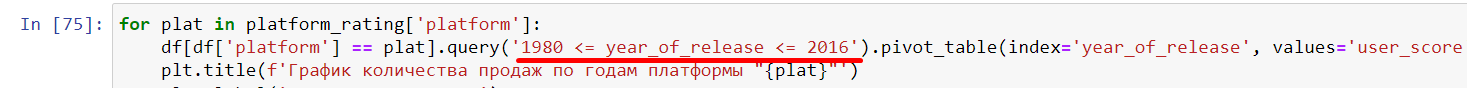

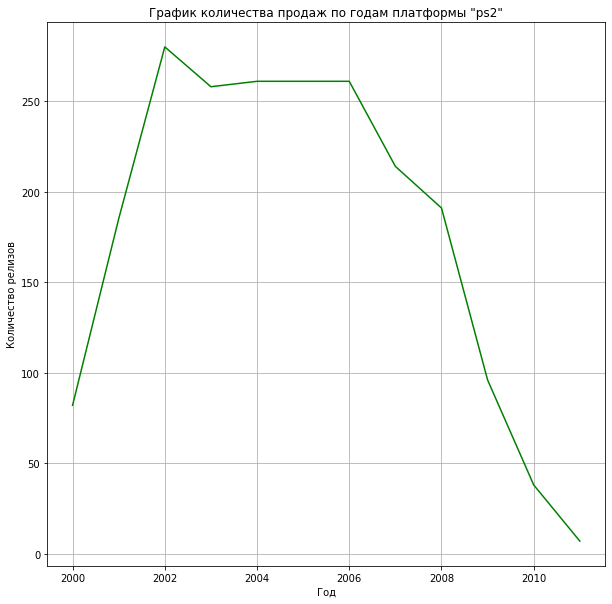

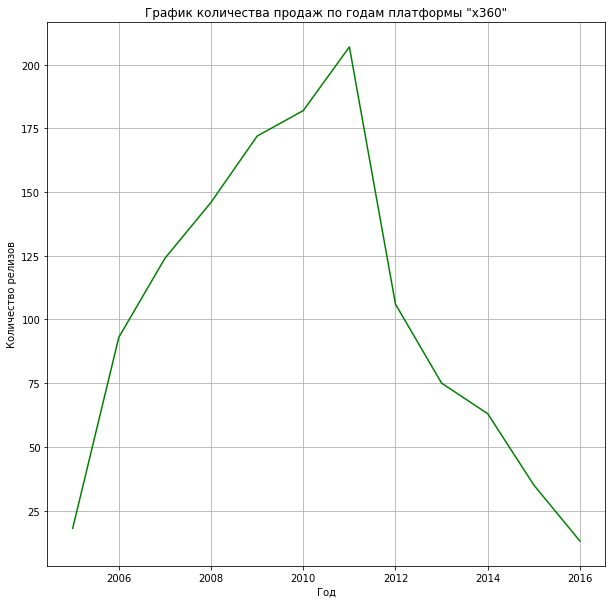

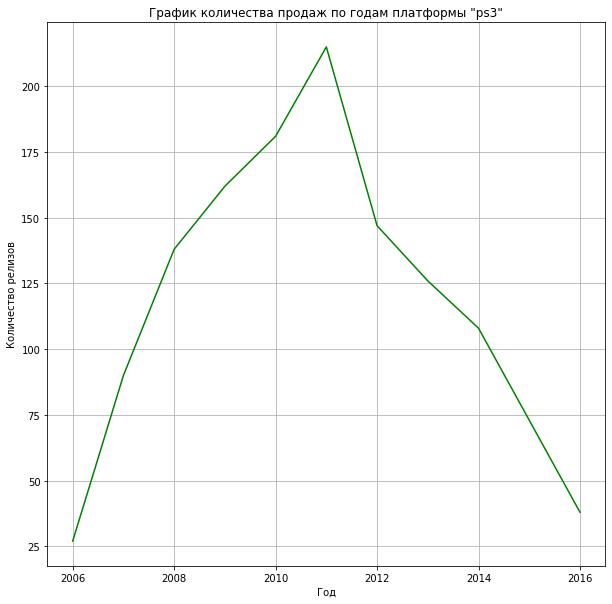

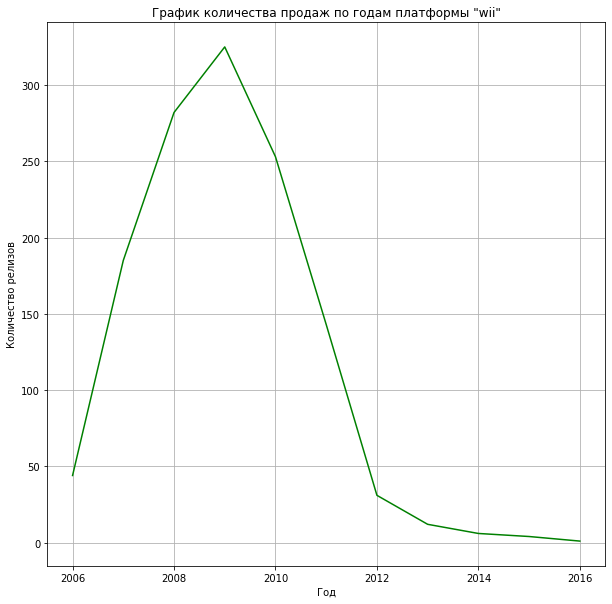

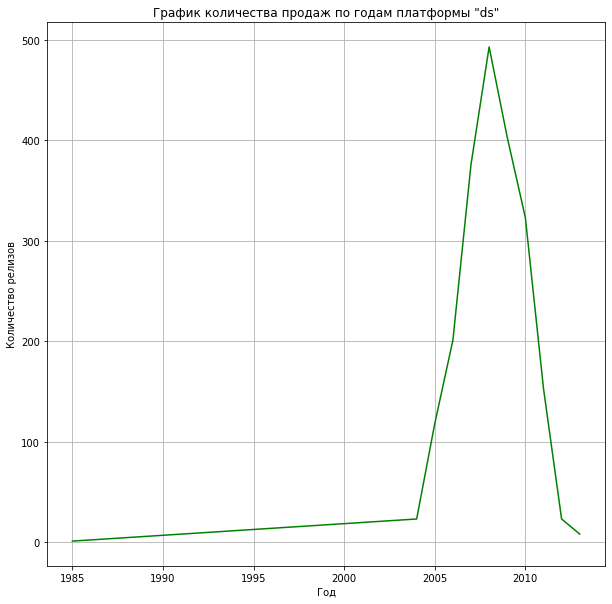

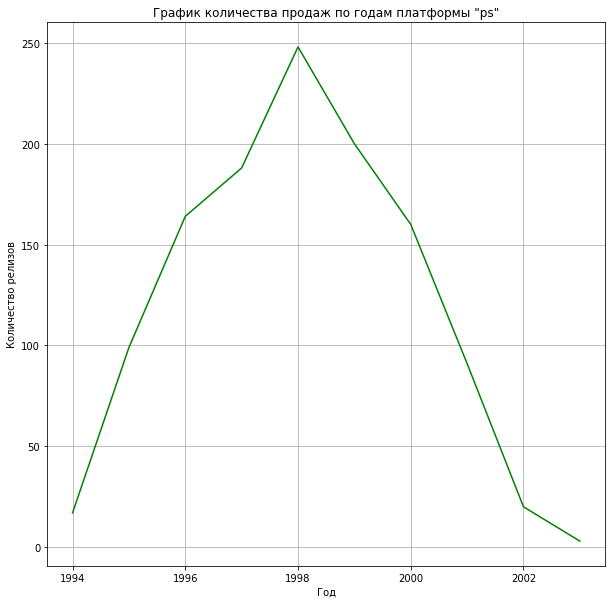

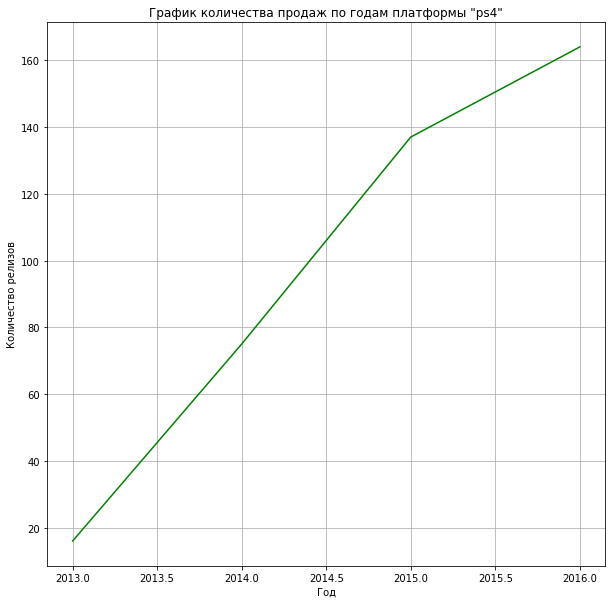

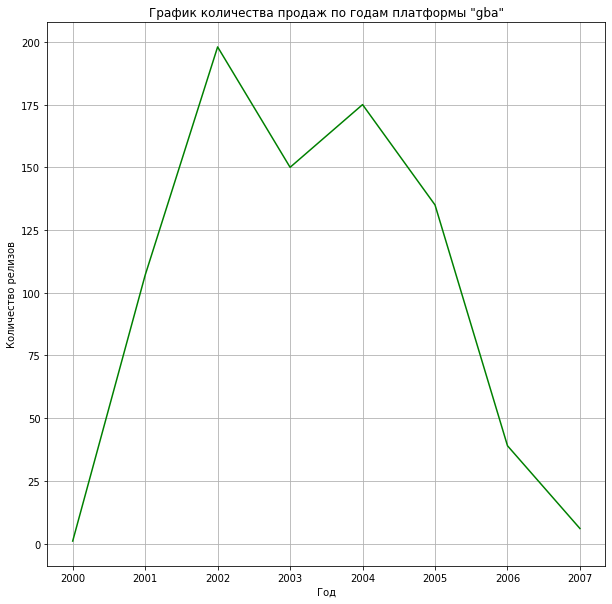

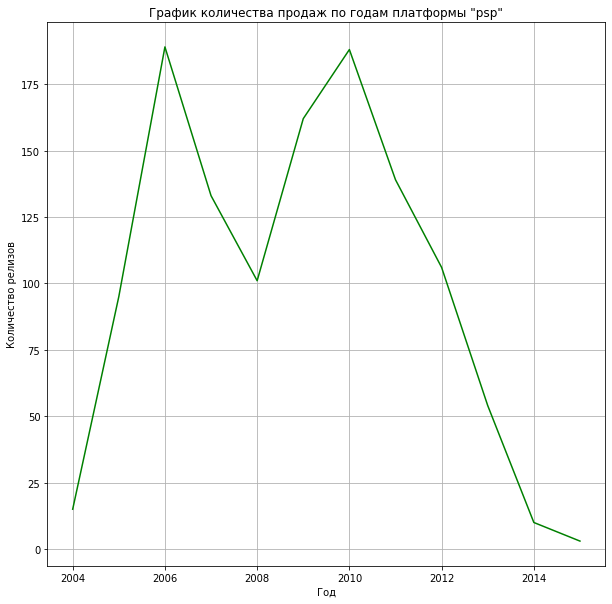

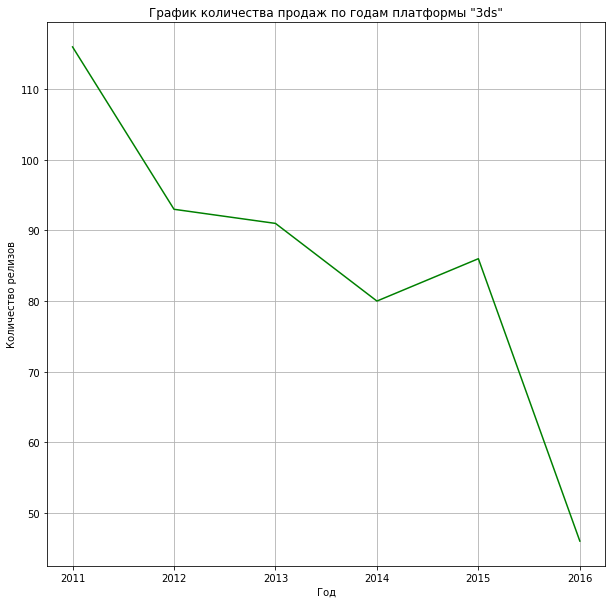

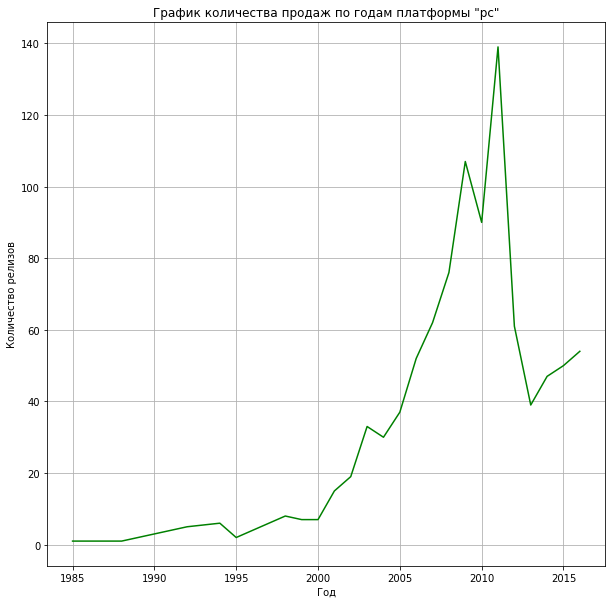

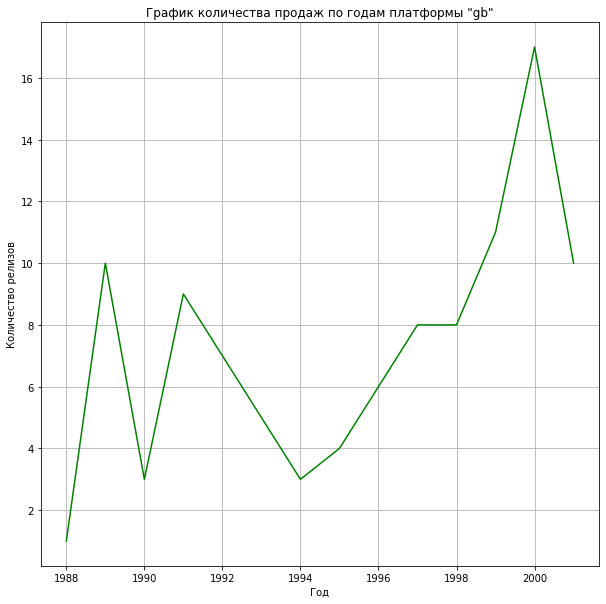

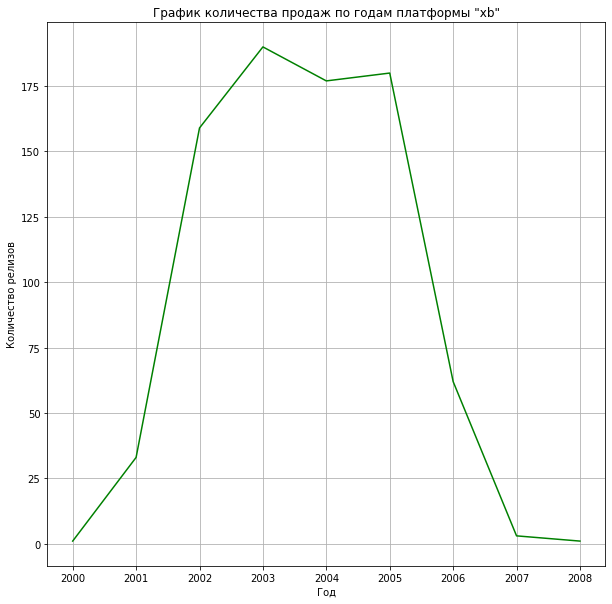

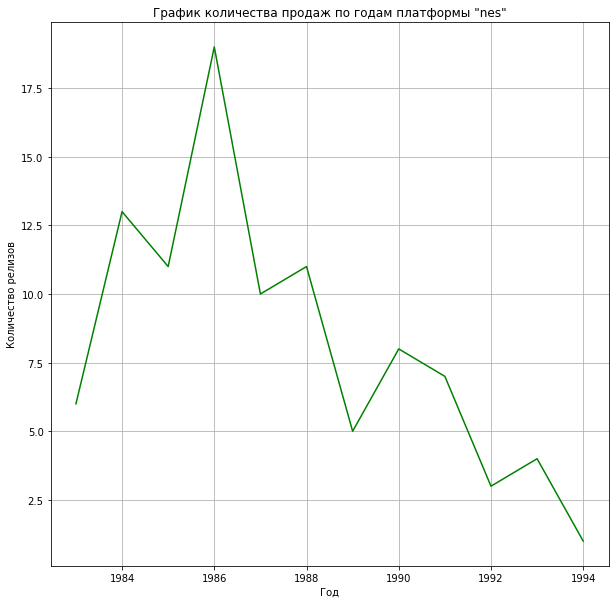

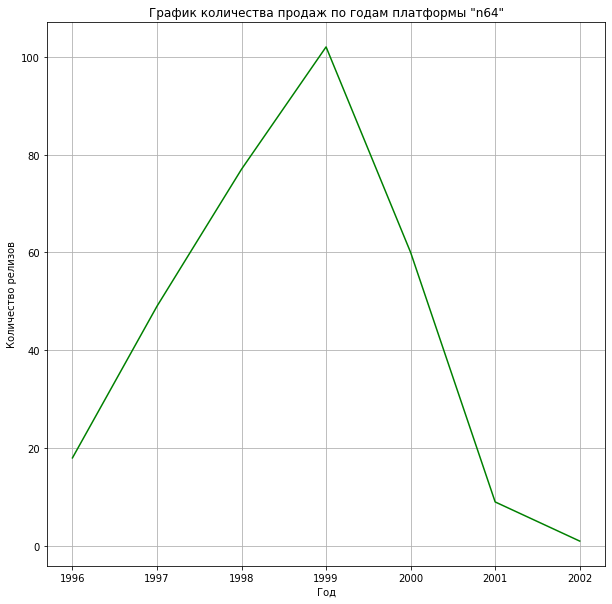

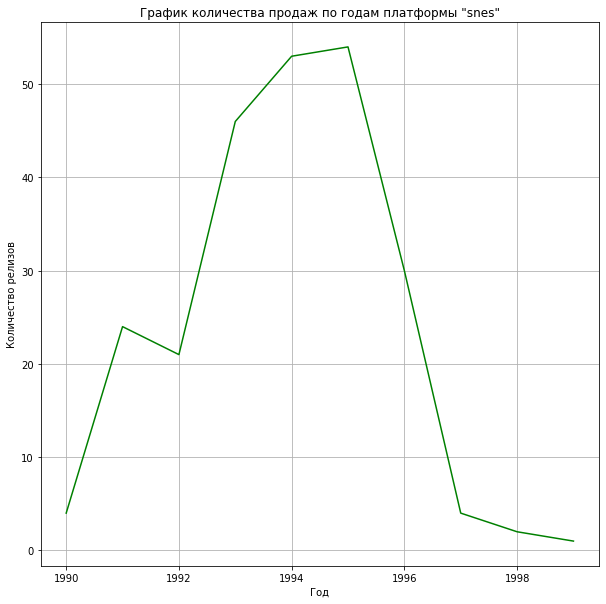

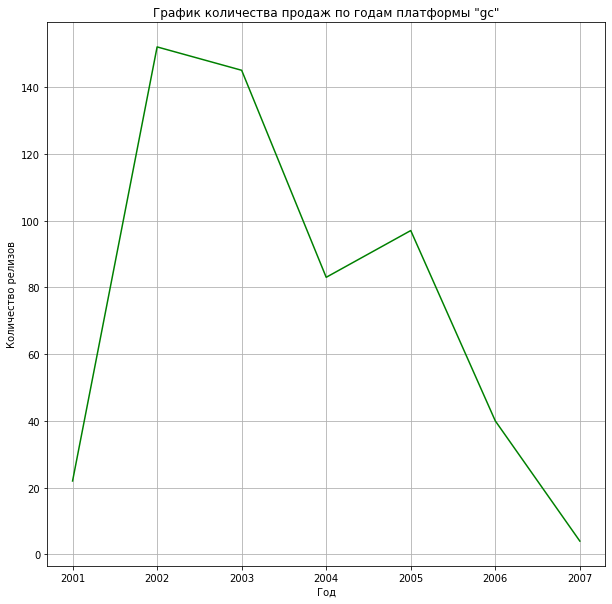

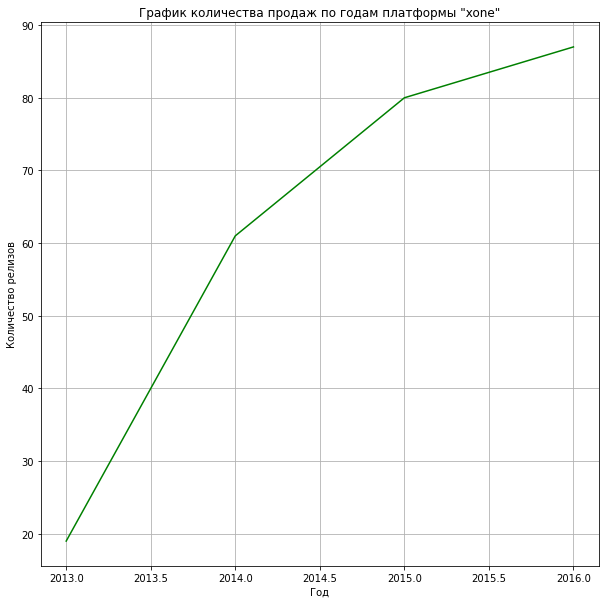

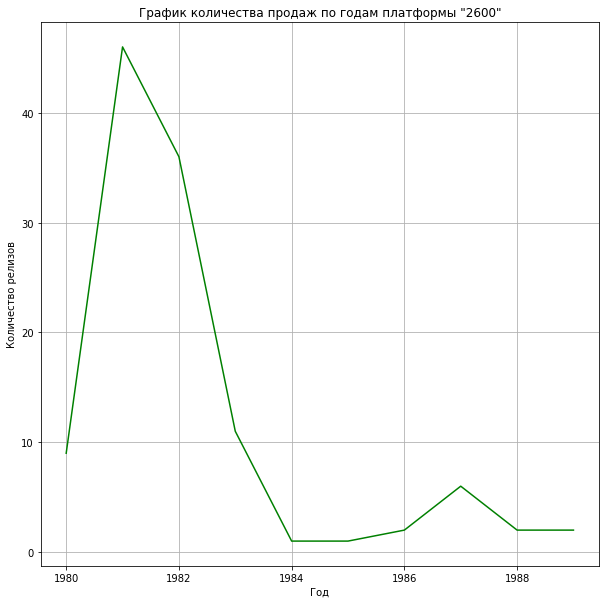

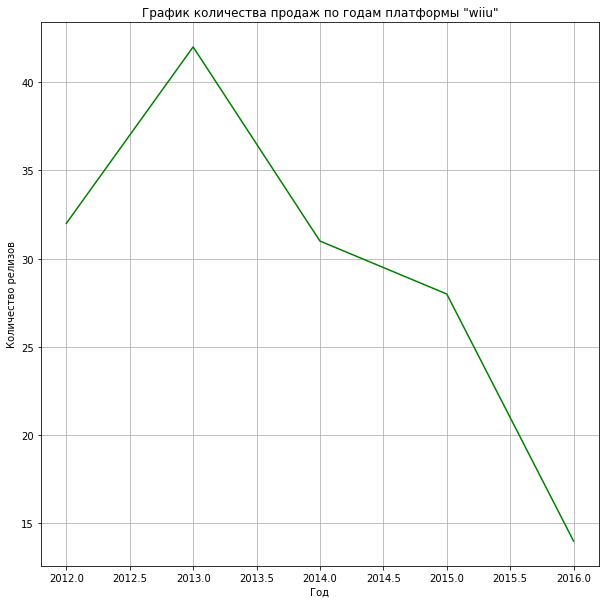

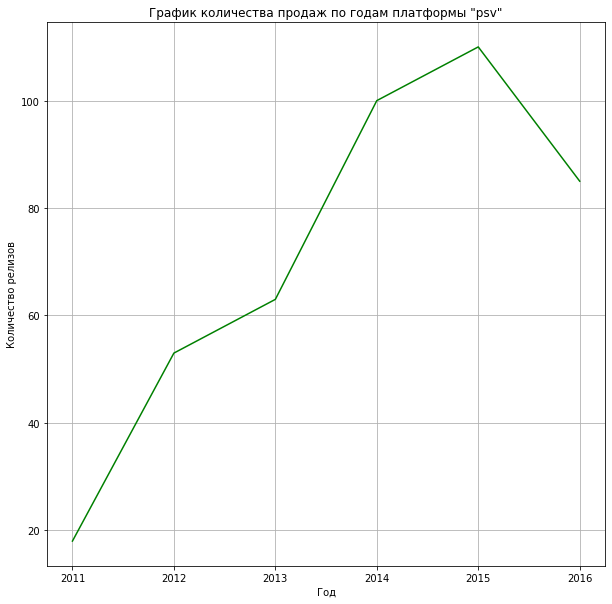

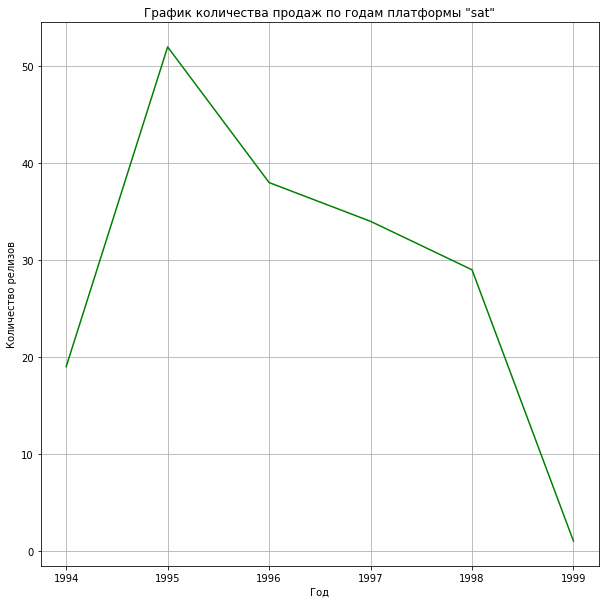

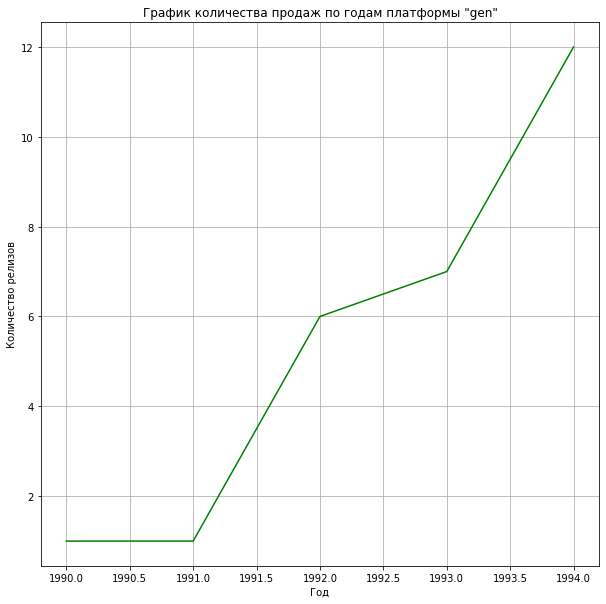

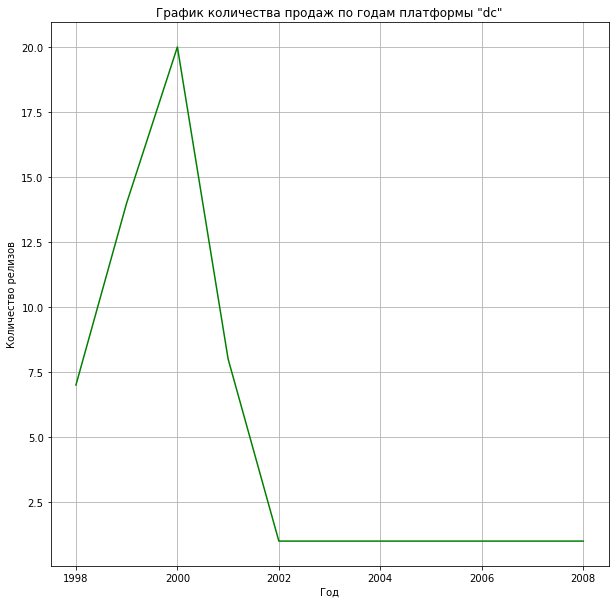

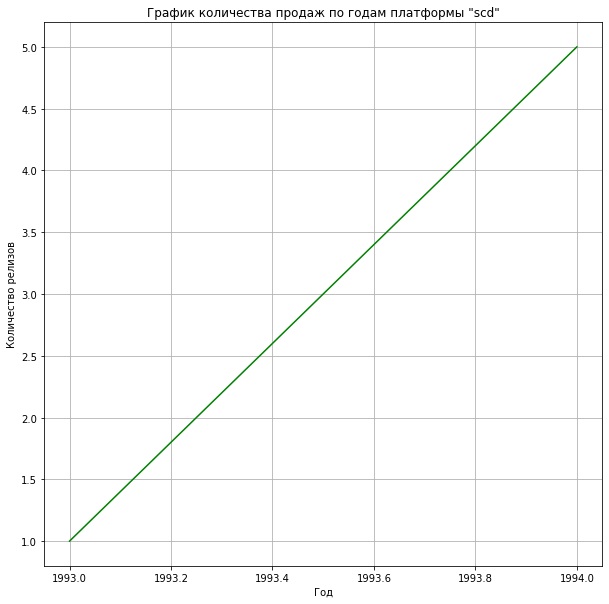

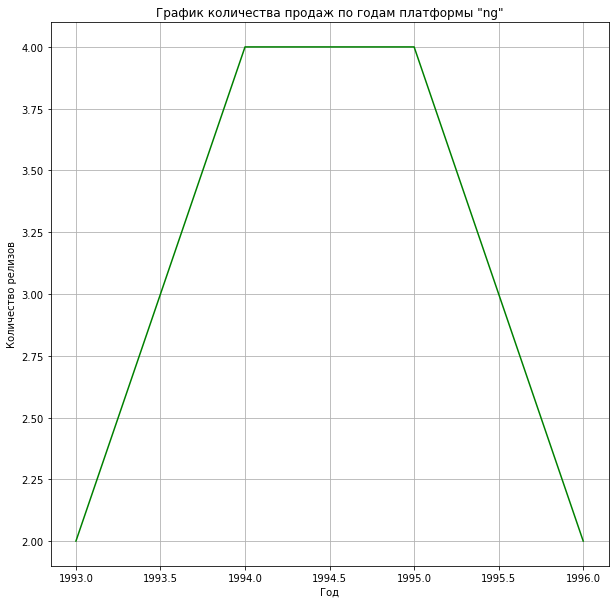

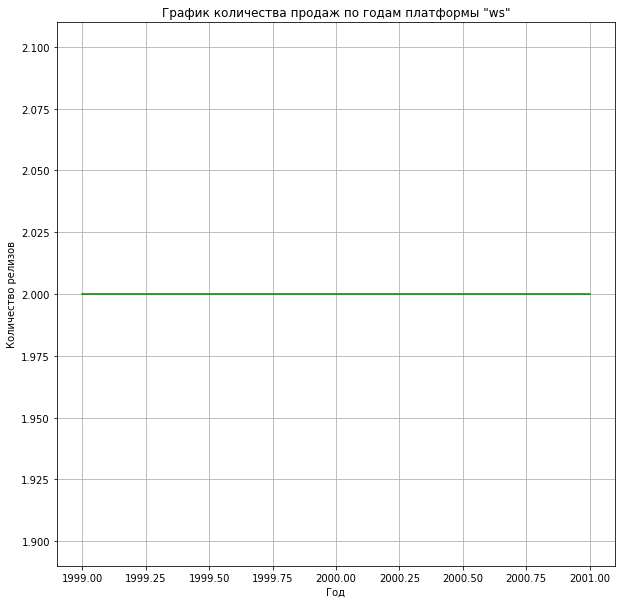

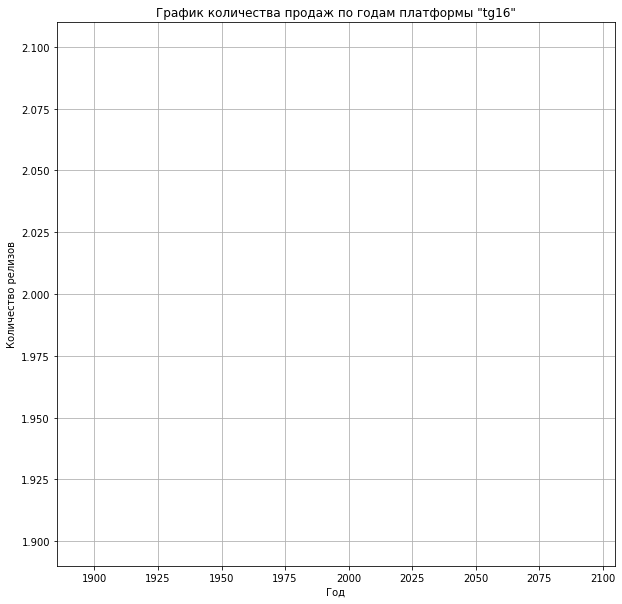

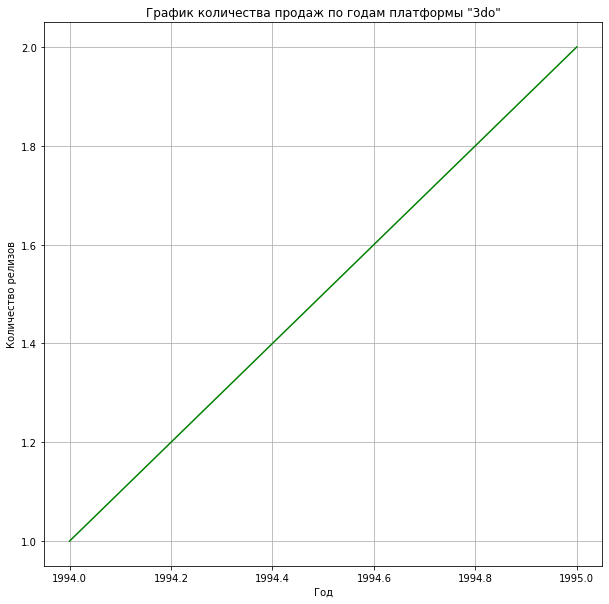

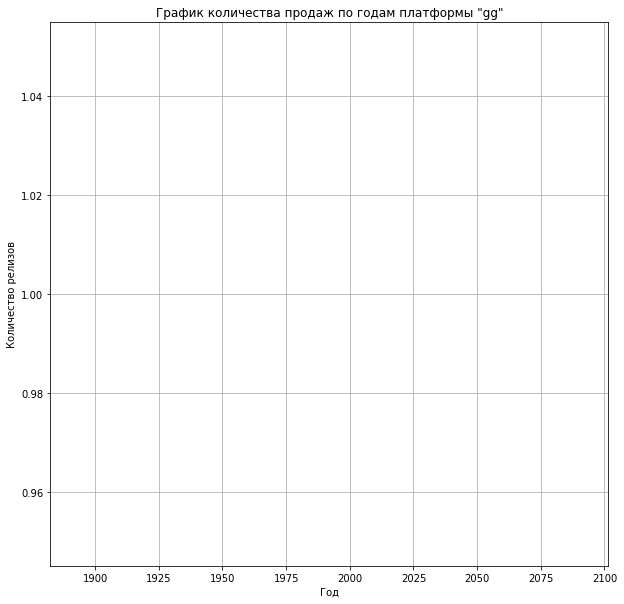

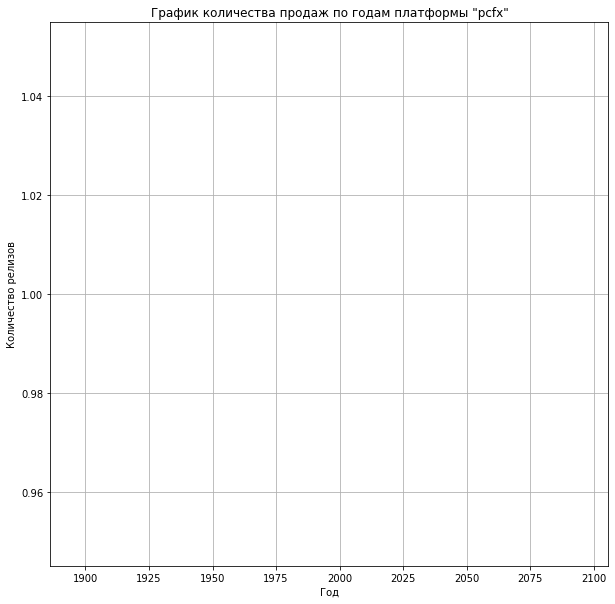

In [75]:
for plat in platform_rating['platform']:
    df[df['platform'] == plat].query('1980 <= year_of_release <= 2016').pivot_table(index='year_of_release', values='user_score', aggfunc='count').plot(color='green', figsize=(10, 10), legend=False, grid=True)
    plt.title(f'График количества продаж по годам платформы "{plat}"')
    plt.ylabel('Количество релизов')
    plt.xlabel('Год')
    plt.show()

Данных о релизах на некоторых(замыкающих в рейтинге) платформах отутствуют или почти отсутствуют, но  с этим мы врятле что-то сделаем: формировать записи, опираясь на открытые источники слишком долго и не оптимально в нашем случае. Но стоит обратить внимание на платформы со значительнымии продажами копий: 'xb' и 'ds'. На старте графиков этих платформ околонулевые значения продаж копий.

Из открытых источников(в нашем случае мы взяли информацию с Википедии) узнаём:
- Дата выпуска Nintendo DS('ds'): 21 ноября 2004 года;
- Дата выпуска Xbox('xb'): 15 ноября 2001 года

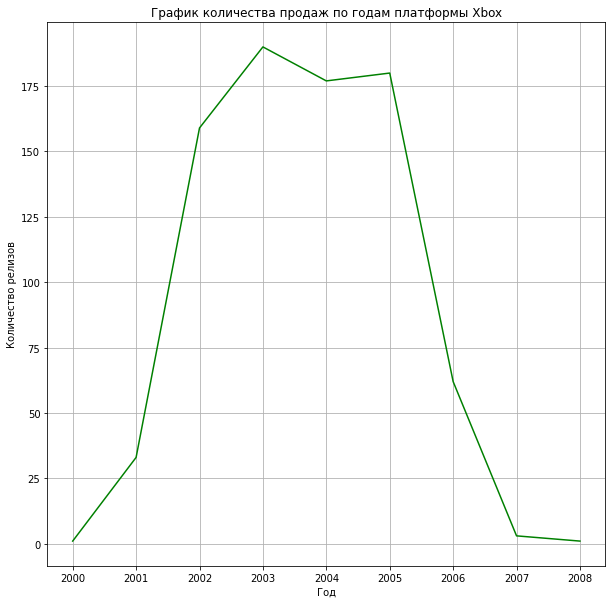

In [76]:
df[df['platform'] == 'xb'].query('1980 <= year_of_release <= 2016').pivot_table(index='year_of_release', values='user_score', aggfunc='count').plot(color='green', figsize=(10, 10), legend=False, grid=True)
plt.title(f'График количества продаж по годам платформы Xbox')
plt.ylabel('Количество релизов')
plt.xlabel('Год')
plt.show()

In [77]:
df.query('platform == "xb" and year_of_release < 2001')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2057,nfl fever 2002,xb,2000,sports,0.74,0.21,0.0,0.04,79,8.5,e,0.99


Нашли аномалию: даже в названии есть намёк на неправдоподобность года релиза, что ещё больши даёт уверенности в решении удалить данную запись. Так и сделаем:

In [78]:
df = df.drop(df.query('platform == "xb" & year_of_release < 2001').index)

Проверим:

In [79]:
df.query('platform == "xb" and year_of_release < 2001')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


Теперь взглянем на график Nintendo DS и избавимся от артефактов:

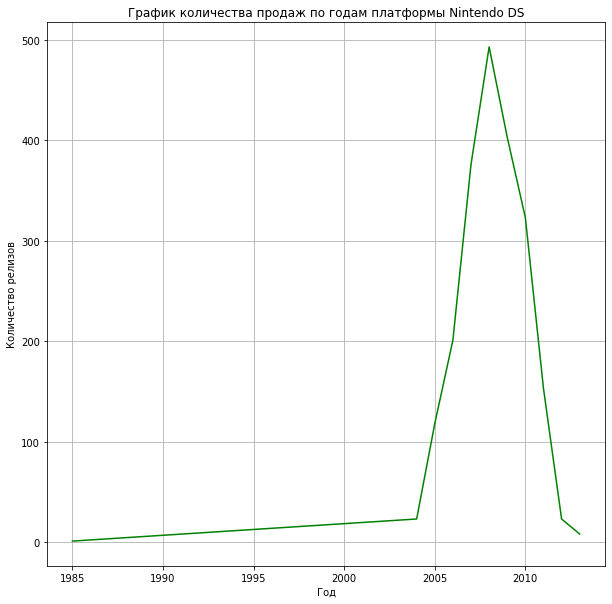

In [80]:
df[df['platform'] == 'ds'].query('1980 <= year_of_release <= 2016').pivot_table(index='year_of_release', values='user_score', aggfunc='count').plot(color='green', figsize=(10, 10), legend=False, grid=True)
plt.title(f'График количества продаж по годам платформы Nintendo DS')
plt.ylabel('Количество релизов')
plt.xlabel('Год')
plt.show()

In [81]:
df.query('platform == "ds" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15719,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1,-1.0,is not defined,0.02


Также одна запись-аномалия. Удалим её:

In [82]:
df = df.drop(df.query('platform == "ds" & year_of_release < 2004').index)

Проверим:

In [83]:
df.query('platform == "ds" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


Найдём медианное время жизни проекта по всем платформам:

In [84]:
c_df = df.copy() 
project_life = c_df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
project_life['life'] = project_life['max'] - project_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
project_life['life'].median()

7.0

Найдём медианное время жизни проекта по топ-10 наиболее популярных платформ:

In [85]:
# Сделаем срез их 10-и наиболее популярных платформ
popular_platform = platform_rating['platform'].unique()[:10]

In [86]:
# Аналог функции медианной жизни проекта, но по топ-10 проектов
c_df = df[df['platform'].isin(popular_platform)].copy()  

project_life = c_df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
project_life['life'] = project_life['max'] - project_life['min'] + 1  # Включая границы диапазона
project_life['life'].median()

10.5

Время жизни производства игр платформы зависит от рентабельности: если платформа приносит значительное количество финансов, то выпуск игр продолжают поддерживать(впролне тривиальный и логичный вывод, но мы выявили это самостоятельно, опираясь на графики). Выпуск игр платформы с плохой выручкой быстро закрывают(могут закрыть выпуск менее чем за год). Максимальное время жизни выпуска игр наиболее популярной платформы составляет примерно 28 лет(в случае 'ds'). Время жизни выпуска игр успешных проектов производители стараются максимально расстянуть, т.к. любой успешный проект имеет колокообразный график, где всегда есть спад: просто так никто не перестаёт выпускать игры, ведь это выгодно. Характерные значение: выпуск игр на успешную платформу продолжают примерно 7-10 лет, но при этом всё зависит от конкретной платформы(как быстро происходит оттток покупок). Минимальный срок выпуска игр может быть меньше года, всё упирается в выручку.

In [87]:
# Комментарий ревьюера
temp = df[df.year_of_release != 2222].copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Как же часто появляются новые платформы? На отдельных графиках тяжело это пределить поэтому построим один график со всеми платформами:

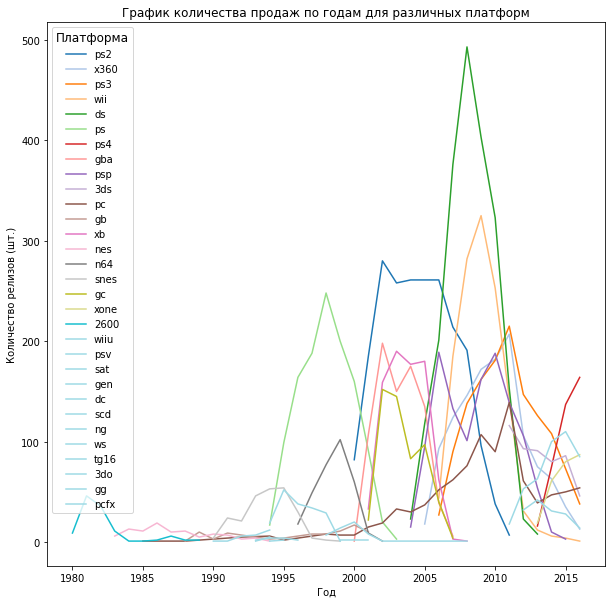

In [88]:
fig, ax = plt.subplots(figsize=(10, 10))
handles = []
labels = []

for plat in platform_rating['platform']:
    df_plat = df[(df['platform'] == plat) & (df['year_of_release'].between(1980, 2016))]  
    pivot_plat = df_plat.pivot_table(index='year_of_release', values='name', aggfunc='count')
    line, = ax.plot(pivot_plat.index, pivot_plat['name'], color=plt.cm.tab20(platform_rating[platform_rating['platform'] == plat].index[0]))
    handles.append(line)
    labels.append(plat)

# Создаем легенду
ax.set_title('График количества продаж по годам для различных платформ')
ax.set_xlabel('Год')
ax.set_ylabel('Количество релизов (шт.)')
ax.legend(handles, labels, title='Платформа', title_fontsize='large', loc='upper left')
plt.show()

Выход новых платформ весьма хаотичный во всём разбросе данных. Визуально на графике сложно сделать конструктивный вывод. Поступим следующим образом: найдём год появления платформы(минимальная дата релиза на платформе), потом найдём следующую очередную дату и вычтем одну из другой, таким образом у нас получится будет ряд чисел. Из этого ряда определим медиану - это и будет характеристикой того как часто выходят новые платформы.

In [89]:
# Сводная таблица которая хранит год выпуска первой игры(будем считать его годом релиза платформы)
svod_t = df.pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values(by='year_of_release')
# Найдём разницу между годами(чтобы не смещать значение возьмём уникальные года)
year_diff = np.diff(svod_t['year_of_release'].unique())
# Найдём медиану
np.median(year_diff)

1.0

Примерно каждый год выходит какая-то новая платформа, но не каждая из них становится известной. Узнаем как часто выходят успешные проекты-платформы, опираясь на топ-10 популярнейших платформ:

In [90]:
# Сводная таблица которая хранит год выпуска первой игры(будем считать его годом релиза платформы)
svod_t = df[df['platform'].isin(platform_rating[:10]['platform'])].pivot_table(index='platform', values='year_of_release', aggfunc='min').sort_values(by='year_of_release')
# Найдём разницу между годами(чтобы не смещать значение возьмём уникальные года)
year_diff = np.diff(svod_t['year_of_release'].unique())
# Найдём медиану
np.median(year_diff)

3.0

Получем следующее: успешные платформы появляются примерно раз в 3 году, любые(успешные/неуспешные) платформы появляются примерно раз в год. Будем считать что новые платформы появляются в диапозоне от года до трёх.

Поиск актуального периода для построения прогноза на 2017-й год:

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальные года наблюдаются с 2013-го по 2016-й год, т.к. много данных лежит в этом диапозоне и именно этот диапозон содержит актуальные тренды игроиндустрии.

Не учитывайте в работе данные за предыдущие годы.

Оставим только актуальные года(2013-2016(включительно)):

In [91]:
data = df.loc[df['year_of_release'].between(2013, 2016)]

In [92]:
len(data)

2234

In [93]:
# Комментарий ревьюера 0
data.year_of_release.max()

2016

Проверим какую долю мы потеряли при исключении данных за года до 1994-го:

In [94]:
(1 - len(data) / len(df)) * 100

86.42605419856605

86% данных мы исключили.

Датафрейм с актуальными годами создан.

Выявление ряда наиболее прибыльных платформ:

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Таблица лидерства продаж(от большего к меньшому) за актуальный период:

In [96]:
platform_rating = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index()
platform_rating.style.background_gradient('viridis')

,platform,all_sales
0,ps4,314.140000
1,ps3,181.430000
2,xone,159.320000
3,3ds,143.250000
4,x360,136.800000
5,wiiu,64.630000
6,pc,39.780000
7,psv,32.990000
8,wii,13.660000
9,psp,3.500000


In [97]:
# Установим платформы в качестве индексов т.к. так мы сможем отобразить названия платформ на графике
platform_rating.set_index('platform', inplace=True)

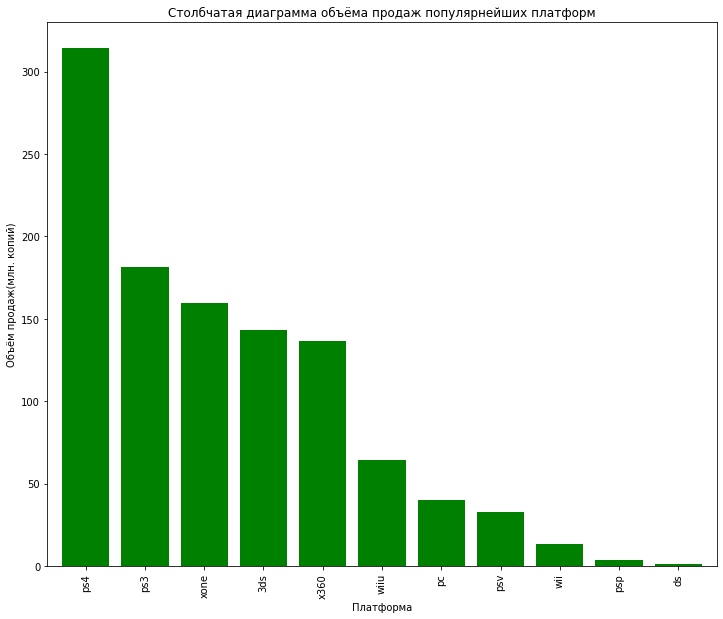

In [98]:
# Строим столбчатую диаграмму
platform_rating.plot.bar(xlabel= 'Платформа', ylabel= 'Объём продаж(млн. копий)', figsize=(12, 10), color='green', width=0.8, legend=False)
plt.title('Столбчатая диаграмма объёма продаж популярнейших платформ')
plt.show()

In [99]:
# Сбросим индекс и вернем его к исходному состоянию
platform_rating.reset_index(inplace=True)

Перезапишем 'massive_platform_rating', т.к. нам будет в дальнейшем этот массив для построения графиков:

In [100]:
massive_platform_rating = platform_rating['platform'].unique()
massive_platform_rating

array(['ps4', 'ps3', 'xone', '3ds', 'x360', 'wiiu', 'pc', 'psv', 'wii',
       'psp', 'ds'], dtype=object)

Топ-3 лидера продаж:

- ps4 ;

- ps3 ;

- Xbox ONE .

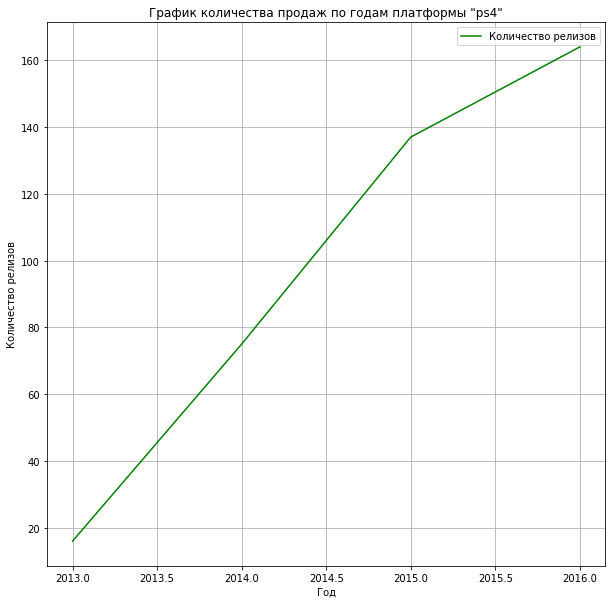

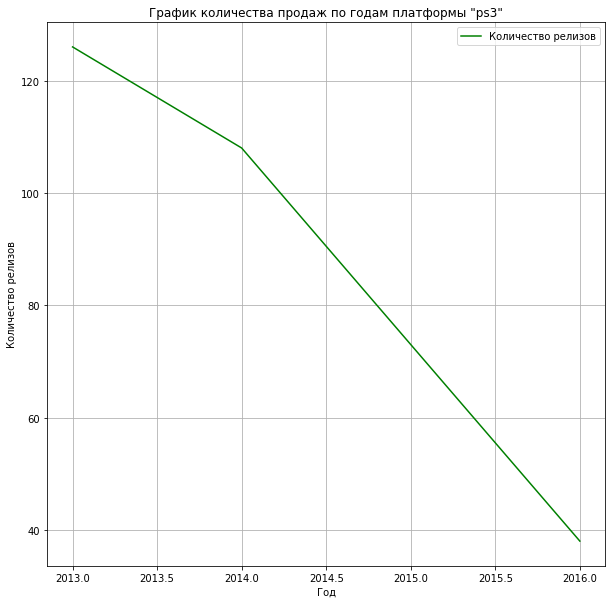

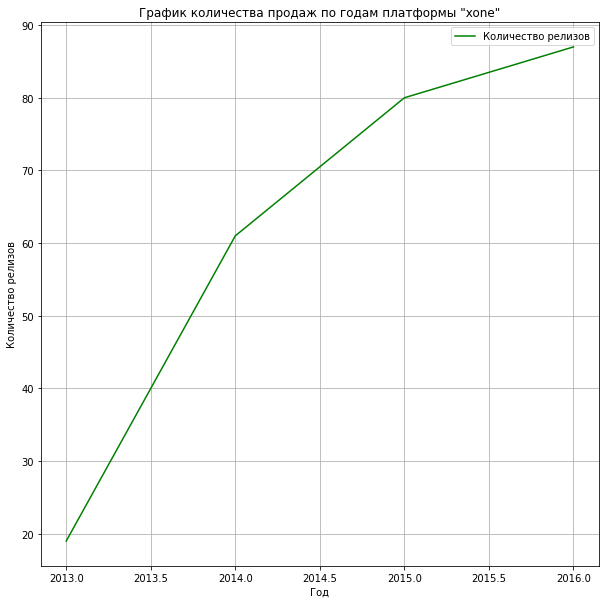

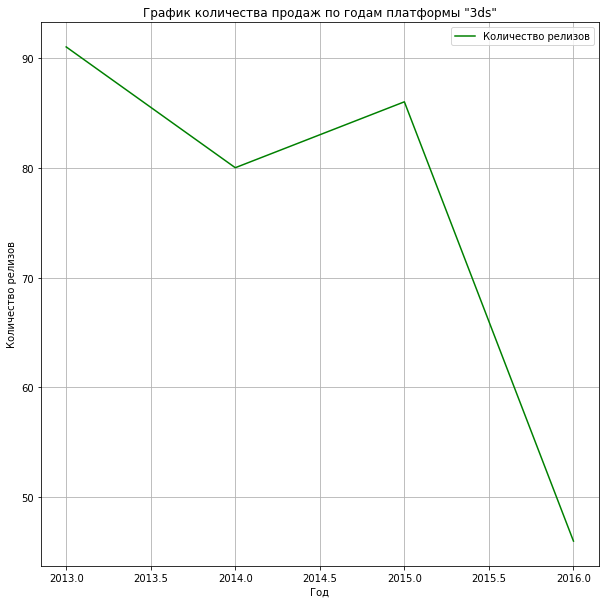

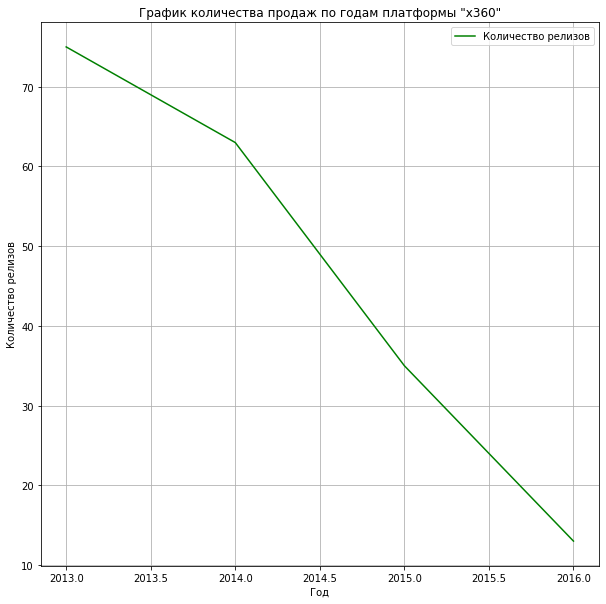

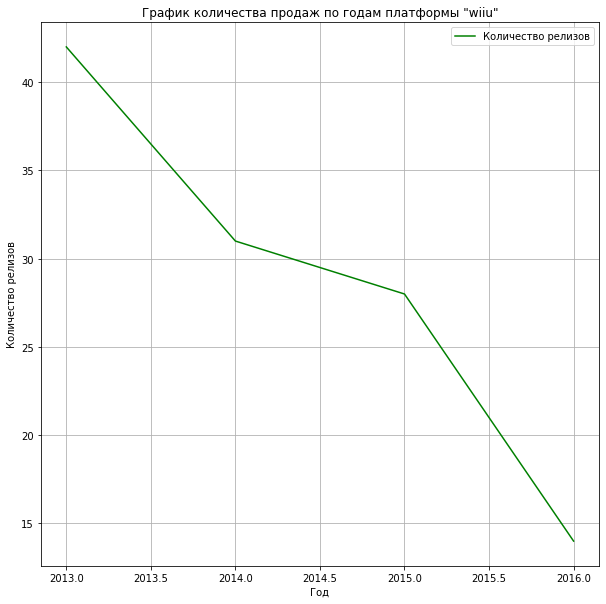

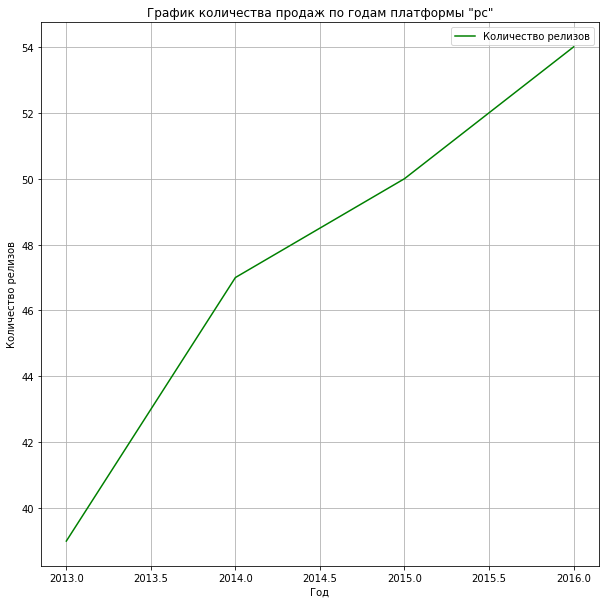

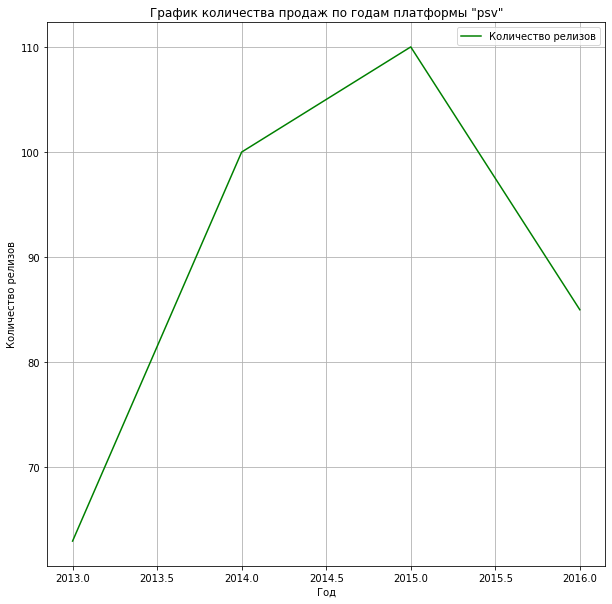

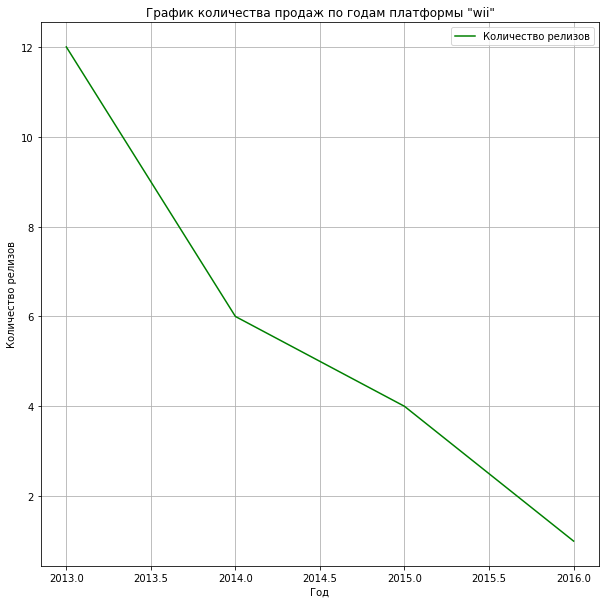

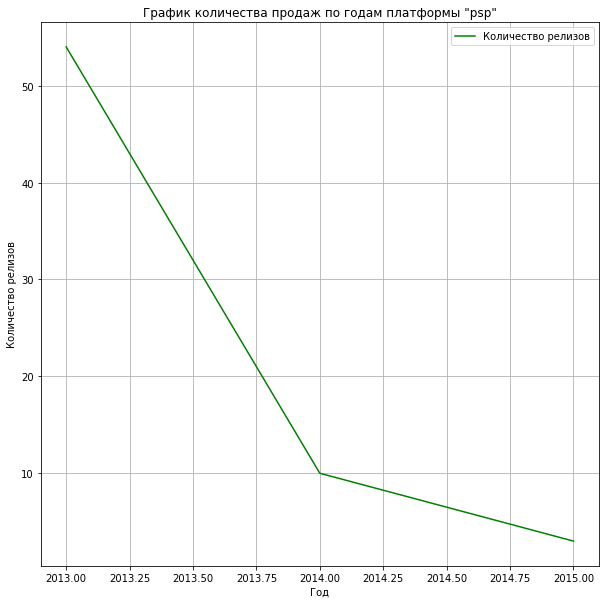

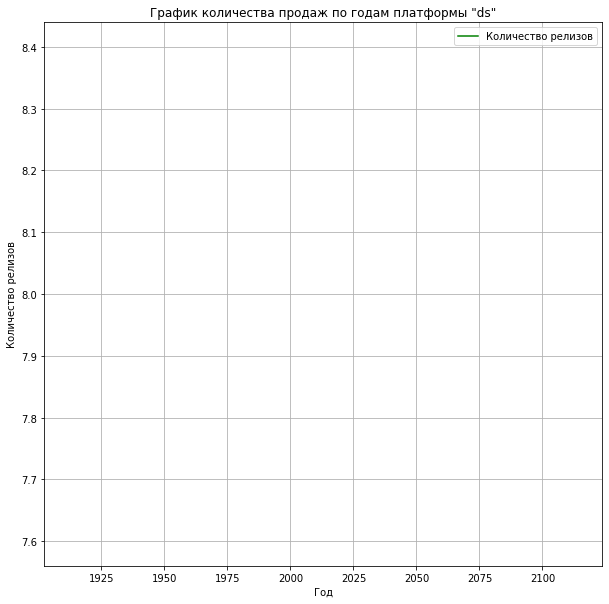

In [101]:
for plat in massive_platform_rating:
    data[data['platform'] == plat].pivot_table(index='year_of_release', values='critic_score', aggfunc='count').plot(color='green', figsize=(10, 10), legend=True, grid=True)
    plt.title(f'График количества продаж по годам платформы "{plat}"')
    plt.ylabel('Количество релизов')
    plt.xlabel('Год')
    plt.legend(['Количество релизов'])
    plt.show()

В основном платформы в последние годы терпят снижение получения выручки с продаж игр. Какие платформы для нас являются потенциально наиболее прибыльными? Потенциально наиболее прибыльные платформы можно разделить на 2 группы:

- стабильные(на долгосрок): график без резких падений и подъёмов, стабильно средний уровень продаж, невысокий риск, пиковое состояние продаж пройдено, но текущее(на 2016) значение не колоссально отличается от значения вершины.

- нестабильные(на долгий период, но потенциально очень прибыльные на актуальный): график имеет резкий взлёт(и возможно падение), растёт стремительно, пик(потолок продаж) ещё не достигнут, есть риск резкого обвала продаж, но потенциальная выручка выше, относительно стабильных вариантов.

Как обычно бывает стабильные варианты имеют средний доход, а вот нестабильные варианты имеют потенциал к высокому доходу. Исходя из графиков и таблицы рейтинга выделяем следующие платформы как хороший вариант для вложения:

- стабильные:

в актульном периоде нет таких, если бы мы взяли все периоды, то таким вариантом служил бы ПК, т.к. на него наиболее стабильно выпускают игры, причиной этому - железо. В ПК обновляются компоненты, но платформа не меняется, что не скажешь про другие проекты.

- нестабильные(на долгий период, но потенциально очень прибыльные на актуальный):

"ps4": 1-ая позиция рейтинга за актуальный период (7-я строчка рейтинга в продажах за всё время). У PlayStation 4 Потолок продаж ещё не достигнут, за плечами компании уже имеется ряд успешных платформ(PlayStation 1 - PlayStation 3), риск существует, но больше выражается в том что компания выпустит следующую платформу(сильный провал PlayStation 4 без выхода новой платформы маловероятен).

"xone": 3-я позиция рейтинга за актуальный период(17-я строчка рейтинга в продажах за всё время). У  Xbox One Потолок продаж ещё не достигнут. За плечами компании есть один успешный проект(Xbox 360 который занимает 2-ую строчку рейтинга в продажах за всё время), риск существует, но больше выражается в том что компания выпустит следующую платформу или возникнут сильные конкуренты.

Построение ящиков с усами и интерпритация выводов по ним:

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Построим графики:

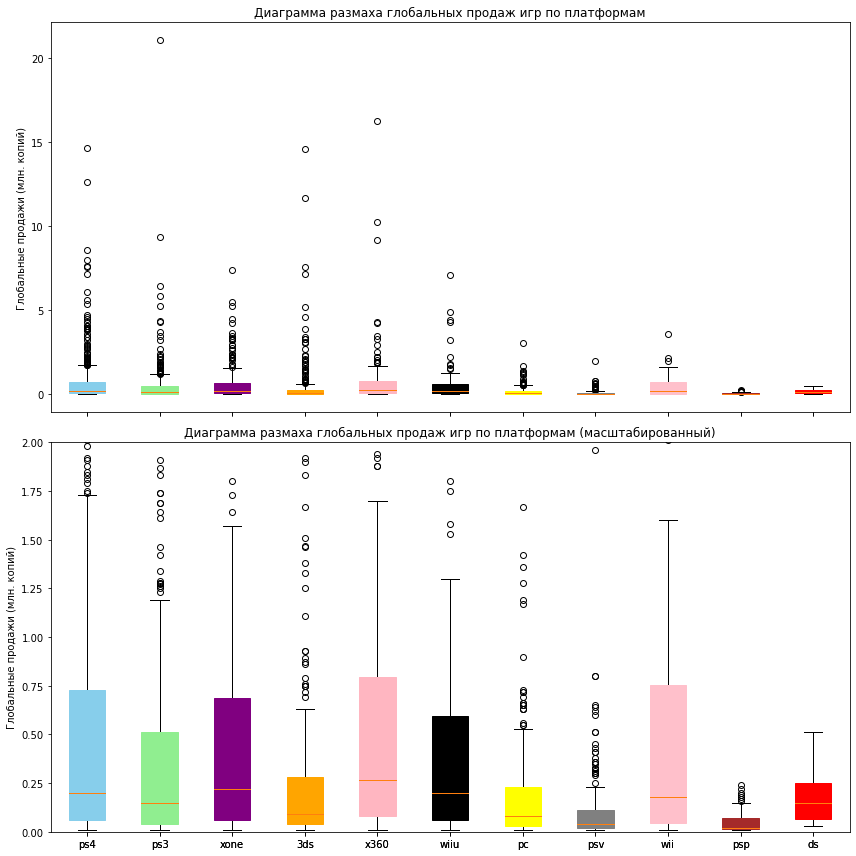

In [102]:
colors = ['skyblue', 'lightgreen', 'purple', 'orange', 'lightpink', 'black', 'yellow', 'grey', 'pink', 'brown', 'red']

# Подготовка данных для дальнейшей работы
data_to_plot = [data[data['platform'] == plat]['all_sales'] for plat in platform_rating['platform']]

# Создание двух графиков на одном листе
fig, axes = plt.subplots(nrows=2, figsize=(12, 12), sharex=True)

# Первый график
bp1 = axes[0].boxplot(data_to_plot, labels=platform_rating['platform'], patch_artist=True)

# Задание цветов 
for box, color in zip(bp1['boxes'], colors):
    box.set(color=color)
    
axes[0].set_ylabel('Глобальные продажи (млн. копий)')
axes[0].set_title('Диаграмма размаха глобальных продаж игр по платформам')

# Второй график с масштабированием для более детального представления
bp2 = axes[1].boxplot(data_to_plot, labels=platform_rating['platform'], patch_artist=True)

# Задание цветов 
for box, color in zip(bp2['boxes'], colors):
    box.set(color=color)
       
# Оформление второго графика(масштабированного)
axes[1].set_ylabel('Глобальные продажи (млн. копий)')
axes[1].set_title('Диаграмма размаха глобальных продаж игр по платформам (масштабированный)')
axes[1].set_ylim(0, 2)

plt.tight_layout()
plt.show()

Построив ящики с усами мы можем отметить следующее: видно что почти у каждой перспективной платформы имеется ряд 'бестселеров', об этом нам сигнализируют 'верхние' выбросы на графиках. Занимательно что на графиках отсутствуют 'нижние' выбросы, т.е. получается что у популярных платформ не бывает прям уж околонулевых продаж копий некоторых релизов. Глядя на медианы можно сказать что у таких платформ как 'psv' и 'psp' они заметно ниже чем у остальных, скорее всего из-за 'угасания' интереса людей к данным платформам.

Исследование влиения пользователей и критиков на продажи:

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Продублируем построение диаграмм рассеяния и поиск коэффицент Пиросна для всех платформ(мы это делали когда пытались восстановить пропуски): взглянем на общий случай, а после на частный(на одну платформу):

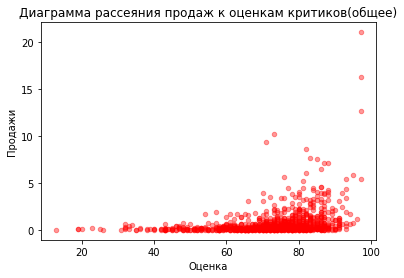

In [104]:
data[data['critic_score'] != -1].plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния продаж к оценкам критиков(общее)')
plt.show()

In [105]:
data[data['critic_score'] != -1]['critic_score'].corr(data['all_sales'])

0.31322157248964294

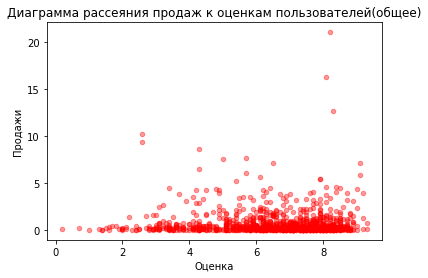

In [106]:
data[data['user_score'] != -1].plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния продаж к оценкам пользователей(общее)')
plt.show()

In [107]:
data[data['user_score'] != -1]['user_score'].corr(data['all_sales'])

-0.002845243675402208

Значение коэффицентов Пирсона и диаграммы рассеяния демонстрируют наличие слабой положительной корреляции общих продаж от оценок критиков и околонулевой корреляции общих продаж с оценками пользователей, т.е. высокие оценки критиков теоритически могут говорить о потенциально высоких продажах, но всё же нужно понимать что это далеко не всегда так(корреляция слабая). По оценкам пользователей нельзя судить о продажах(корреляция околонулевая).Посмотрим на частный случай популярной платформы - PlayStation 4.

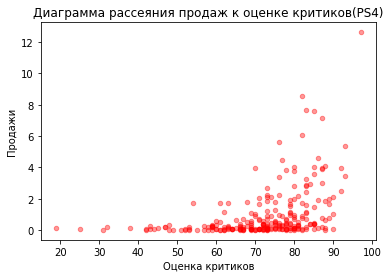

In [108]:
data[data['critic_score'] != -1].query('platform == "ps4"').plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния продаж к оценке критиков(PS4)')
plt.show()

In [109]:
data[data['critic_score'] != -1].query('platform == "ps4"')['critic_score'].corr(data['all_sales'])

0.40656790206178095

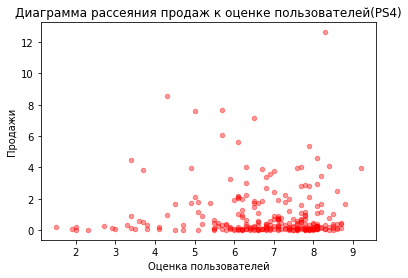

In [110]:
data[data['user_score'] != -1].query('platform == "ps4"').plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния продаж к оценке пользователей(PS4)')
plt.show()

In [111]:
data[data['user_score'] != -1].query('platform == "ps4"')['user_score'].corr(data['all_sales'])

-0.031957110204556376

Оценки критиков платформы PlayStation 4 имеют также слабую корреляцию(хотя она немного сильнее) с общими продажами, также околонулевая корреляция общих продаж с пользовательскими оценками. Взглянем на корреляцию с общими продажами 5-и других популярных платформ. 

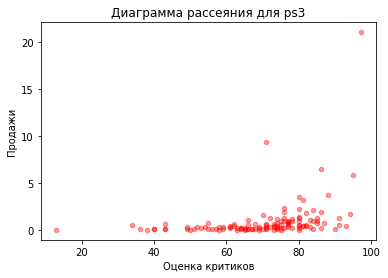

0.3342853393371919


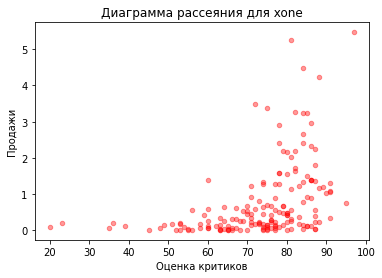

0.4169983280084017


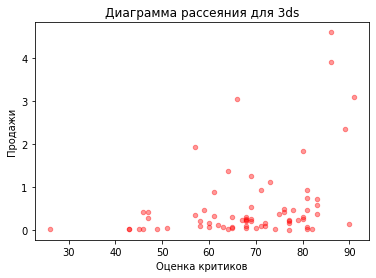

0.3570566142288103


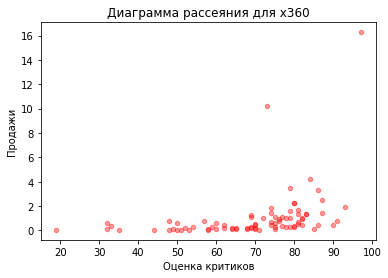

0.3503445460228664


In [112]:
for pl in platform_rating['platform'][1:5]:
    data[data['critic_score'] != -1].query('platform == @pl').plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.title(f'Диаграмма рассеяния для {pl}')
    plt.show()
    print(data[data['critic_score'] != -1].query('platform == @pl')['critic_score'].corr(data['all_sales']))

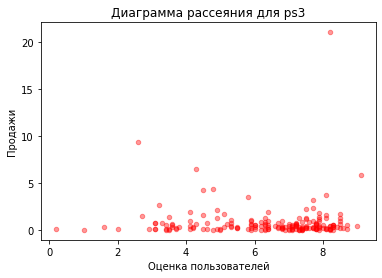

0.0023944027357566925


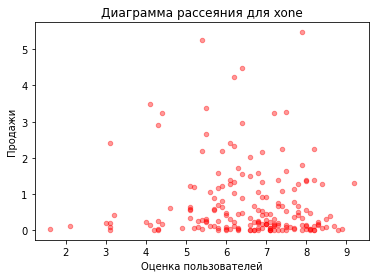

-0.06892505328279414


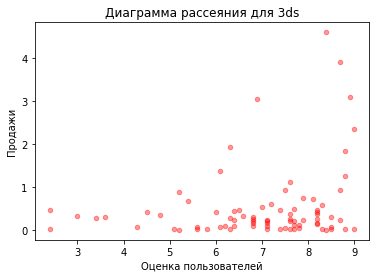

0.24150411773563016


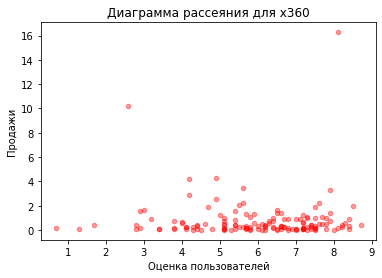

-0.011742185147181342


In [113]:
for pl in platform_rating['platform'][1:5]:
    data[data['user_score'] != -1].query('platform == @pl').plot(x='user_score', y='all_sales', kind='scatter', alpha=0.4, color='red')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.title(f'Диаграмма рассеяния для {pl}')
    plt.show()
    print(data[data['user_score'] != -1].query('platform == @pl')['user_score'].corr(data['all_sales']))

Сравнивая с другими популярными платформами можно сделать следующие выводы: корреляция общих продаж с оценками критиков с большой вероятностью положительна, но слаба:  в общем случае, в случае 1-й наиболее популярной платформы, в случае 5-и популярных платформ не превышает порог слабой положительной корреляции, а значит не стоит сильно полагаться на оценки критико(они могут сигнализировать о уровне продаж, а могут и нет). Корреляция общих продаж с пользовательскими оценками практически всегда околонулевая, но в нашем исследовании попалась одна платформа где была слабая положительная корреляция: по оценкам пользователей вообще не стоит делать какие прогнозы на продажи, т.к. почти не существует связи за редким исключением.

Построение общего распределение игр по жанрам:

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [114]:
genre_pt = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False).reset_index()
genre_pt.style.background_gradient('viridis')

,genre,name
0,action,767
1,role-playing,292
2,adventure,245
3,sports,214
4,shooter,187
5,misc,155
6,racing,85
7,fighting,80
8,platform,74
9,simulation,62


In [115]:
# Установим платформы в качестве индексов т.к. так мы сможем отобразить названия платформ на графике
genre_pt.set_index('genre', inplace=True)

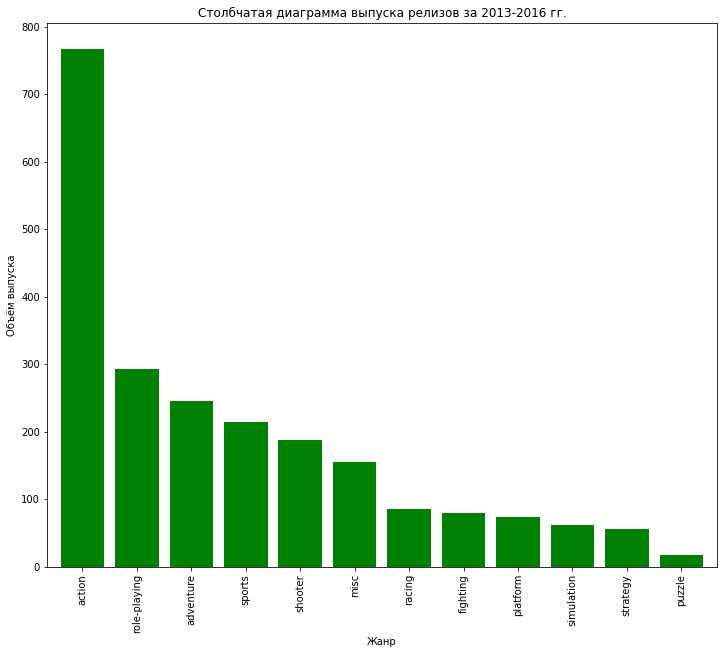

In [116]:
# Строим столбчатую диаграмму
genre_pt.plot.bar(xlabel= 'Жанр', ylabel= 'Объём выпуска', figsize=(12, 10), color='green', width=0.8, legend=False)
plt.title('Столбчатая диаграмма выпуска релизов за 2013-2016 гг.')
plt.show()

Жанр категорий экшен наиболее выпускаем(767 релизов этого жанра, за ним жанр ролевые(292), после жанр приключения(245) и т.д. Объёмы релизов самого выпускаемого жанра и самого не выпускаемого отличаются примерно в 45 раз.

Вглянем на суммарные продажи по жанрам на всех платформах:

In [117]:
genre_pt_s = data.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).reset_index()
genre_pt_s.style.background_gradient('viridis')

,genre,all_sales
0,action,322.220000
1,shooter,232.980000
2,sports,150.650000
3,role-playing,145.890000
4,misc,62.820000
5,platform,42.630000
6,racing,39.890000
7,fighting,35.310000
8,adventure,23.640000
9,simulation,21.760000


In [118]:
# Установим платформы в качестве индексов т.к. так мы сможем отобразить названия платформ на графике
genre_pt_s.set_index('genre', inplace=True)

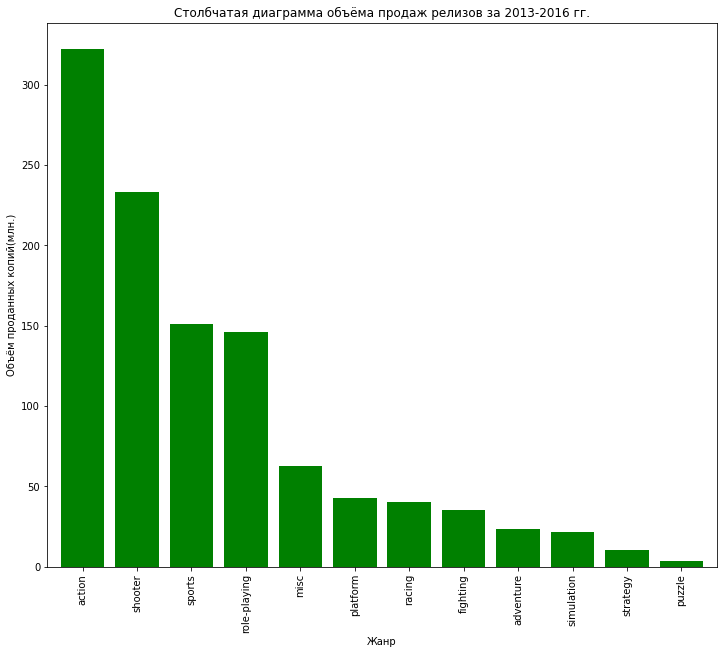

In [119]:
# Строим столбчатую диаграмму
genre_pt_s.plot.bar(xlabel= 'Жанр', ylabel= 'Объём проданных копий(млн.)', figsize=(12, 10), color='green', width=0.8, legend=False)
plt.title('Столбчатая диаграмма объёма продаж релизов за 2013-2016 гг.')
plt.show()

Позиции самых выпускаемых жанров и позиции самых суммарно продаваемых жанров немного отличаются, но нам необходимо ещё взглянуть на медианные продажи по каждому жанру, т.к. есть вероятность что высокую позицию в рейтинге жанра по суммарным продажам могла подарить допустить только одна или несколько 'бестселерных' игр на какой-то одной(или нескольких) платформе(ах). Если данная особенность проявиться, то стоит убрать таковой жанр из списка потенциально выгодных, так как ставка на такой жанр несёт больший риск ежели ставка на жанр которые занимает уверенную позицию во всех наших сравнениях. При составлении наиболее прибыльных и стабильных жанров первоочерёдно будем обращаться к рейтинги медианных продаж, потом к рейтингу суммарных продаж, затем к рейтингу наиболее выпускаемых жанров.

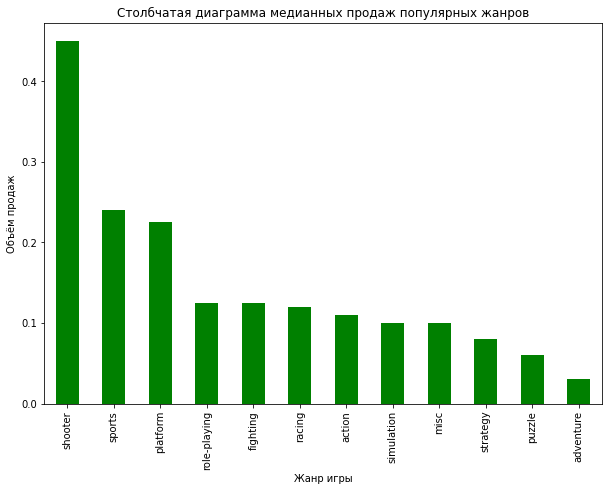

In [120]:
genre_rating = data.pivot_table(index='genre', values='all_sales', aggfunc={'median'}).sort_values(by='median', ascending=False)
genre_rating.plot.bar(legend=False, color='green', figsize=(10, 7))
plt.title('Столбчатая диаграмма медианных продаж популярных жанров')
plt.xlabel('Жанр игры')
plt.ylabel('Объём продаж')
plt.show()

Столбчатая диаграмма очень ёмко и красиво описывает наши медианные значения продаж по всем платформам, но хотелось бы увидеть наиболее полную информацию о продажах(пускай и для восприятия это менее эффективно): увидеть квантили, межквартильное расстояние и т.д. для более тщательного анализа. Для этого построим ряд диаграмм размаха по каждому жанру:

In [121]:
genre_rating = genre_rating.reset_index('genre')

In [122]:
genre_rating = genre_rating['genre'].to_numpy()

In [123]:
genre_rating

array(['shooter', 'sports', 'platform', 'role-playing', 'fighting',
       'racing', 'action', 'simulation', 'misc', 'strategy', 'puzzle',
       'adventure'], dtype=object)

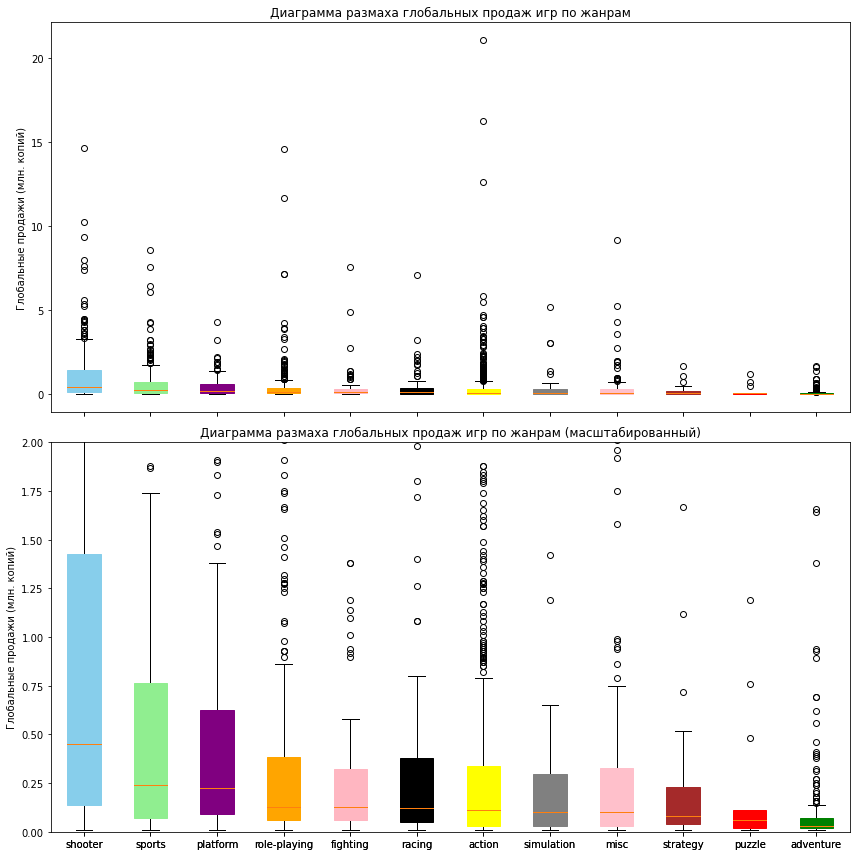

In [124]:
colors = ['skyblue', 'lightgreen', 'purple', 'orange', 'lightpink', 'black', 'yellow', 'grey', 'pink', 'brown', 'red', 'green', 'blue']

# Подготовка данных для дальнейшей работы
data_to_plot = [data[data['genre'] == gen]['all_sales'] for gen in genre_rating]

# Создание двух графиков на одном листе
fig, axes = plt.subplots(nrows=2, figsize=(12, 12), sharex=True)

# Первый график
bp1 = axes[0].boxplot(data_to_plot, labels=genre_rating, patch_artist=True)

# Задание цветов 
for box, color in zip(bp1['boxes'], colors):
    box.set(color=color)
    
axes[0].set_ylabel('Глобальные продажи (млн. копий)')
axes[0].set_title('Диаграмма размаха глобальных продаж игр по жанрам')

# Второй график с масштабированием для более детального представления
bp2 = axes[1].boxplot(data_to_plot, labels=genre_rating, patch_artist=True)

# Задание цветов 
for box, color in zip(bp2['boxes'], colors):
    box.set(color=color)
       
# Оформление второго графика(масштабированного)
axes[1].set_ylabel('Глобальные продажи (млн. копий)')
axes[1].set_title('Диаграмма размаха глобальных продаж игр по жанрам (масштабированный)')
axes[1].set_ylim(0, 2)

plt.tight_layout()
plt.show()

Рейтинг самых выпускаемых жанров и самых рентабельных немного отличается. Наиболее продаваемые жанры игр: экшен, шутер, спорт и другие. Объёмы самого рекордного жанра по продажам и наименее рентабельного отличаются примерно в 100 раз. Наиболее продаваемые жанры по всем платформах(т.е. наиболее стабильные) также отличаются: медианные продажи 1-го и последнего места отличаются примерно в 9-10 раз.

Опираясь на 3 графика рейтинга можем однозначно сказать, что если оптимально подобрать жанр для создания игр, то можно заработать гораздо гораздо больше: выбор оптимального жанра существенно влияет на рентабельность проекта, дифференциация в объёмах продаж колоссально значительна(цвета на таблицах рейтинга отличаются явно/графики также это подтверждают). Жанры с высокими объёмами продаж выделяются из общей массы гораздо сильнее чем жанры с самыми низкими объёмами(популярнейшие жанры сильнее отклоняются от центральной тенденции чем жанры с наименьшей популярностью).

Результируем пункт и находим оптимальные жанры: Прежде чем определяться с жанром игры, лучше сразу обдумать под какую платформу мы будем её выпускать и провести дополнительное исследования, опираясь на наше: так потенциально возможно заработать больше, ведь какой-то жанр может очень хорошо себя показывать на одной платформе, а на другой плохо(больше аналитики - меньше риски). Если дополнительное исследование не выгодно или на это нету времни, то согласно нашему исследованию получаем вот такие потенциально хорошие варианты для выпуска игр(они прибыльны и довольно стабильны):

- шутер: самое высокое медианное значение и совсем нету выбросов сверху, что демонстрирует хорошую надёжность, по суммарным продажам занимает 2-е место среди всех(почти лидер по продажам и при этом более менее безопасен), по объёму выпуска занимает 5-е место, также замечательно: на рынке нету избытка этого жанра(пользователей будет не так сложно удивить) и при этом есть хорошие и продаваемые представители этого жанра: можно взглянуть на лучшие релизы  и выделить для нашего проекта некие преимущества и чему-то поучиться.

- спорт: 2-й по рейтингу медиан(немного выбросов сверху), 4-й по выпуску релизов, 3-ий по суммарным продажам: имеет такие же преимущетсва как и жанр шутер, но при этом немного проигрывает ему.

- платформер: немного иная ситуация. По медианным продажам этот жанр силён - 3-е место(при этом выбросов немного, но больше чем в жанрах выше). Рекорды по суммарным продажам не такие впечатлительные(6-е место). Но вот что делает данный жанр очень неплохой альтернативой: количество выпускаемых игр -  их мало(9-е место в рейтинге). Что это значит? Игрокам интересен этот жанр: высокие медианные продажи при том что релизов маловато говорят об этом. Если у Вас есть хороший запас мощностей, креатива и желания сделать по-настоящему прорывной релиз в этом жанре, то есть хорошая возможность заработать.

#### Составление портрета пользователя каждого региона: 

*Определите для пользователя каждого региона (NA, EU, JP):*

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.

- Самые популярные жанры (топ-5). Поясните разницу.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Найдём топ-5 платформ в Северной Амереке:

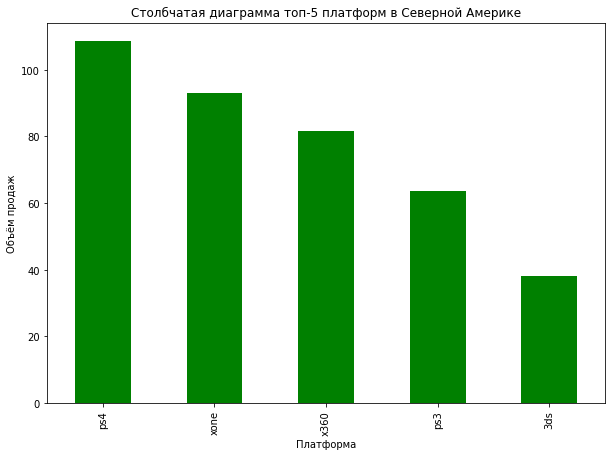

,na_sales,percent
platform,,
ps4,108.740000,0.248395
xone,93.120000,0.212714
x360,81.660000,0.186536
ps3,63.500000,0.145053
3ds,38.200000,0.087260


In [125]:
most_popular_platform_na = data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index().head(5)
most_popular_platform_na.set_index('platform', inplace=True)
most_popular_platform_na.plot.bar(legend=False, color='green', figsize=(10, 7))
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.title('Столбчатая диаграмма топ-5 платформ в Северной Америке')
plt.show()


total_na_sales = data['na_sales'].sum()
most_popular_platform_na['percent'] = most_popular_platform_na['na_sales'] / total_na_sales
most_popular_platform_na.style.background_gradient('viridis')

<div class="alert alert-info"> <b>Комментарии студента:</b> А можно как-то без использования метода 'set_index' вывести названия платформ в столбчатой диаграмме(допустим при построении диаграммы может есть какой-то параметр который меняет индексы)?</div>

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Можно колонке с платформами присвоить атрибут индекс и дропнуть лишнюю колонку с платформами.</font>

Найдём топ-5 платформ в Европе:

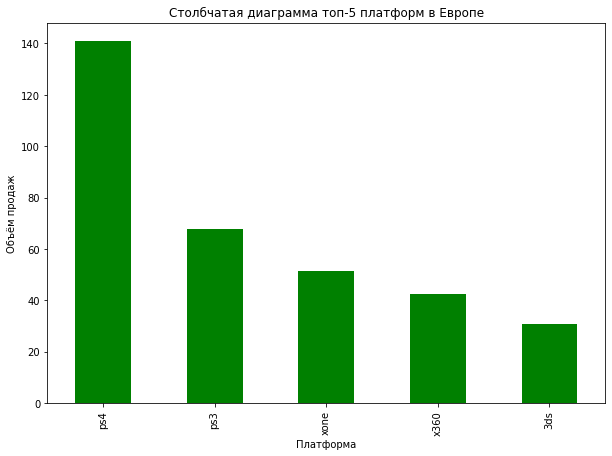

,eu_sales,percent
platform,,
ps4,141.090000,0.359483
ps3,67.810000,0.172773
xone,51.590000,0.131446
x360,42.520000,0.108337
3ds,30.960000,0.078883


In [126]:
most_popular_platform_eu = data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index().head(5)
most_popular_platform_eu.set_index('platform', inplace=True)
most_popular_platform_eu.plot.bar(legend=False, color='green', figsize=(10, 7))
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.title('Столбчатая диаграмма топ-5 платформ в Европе')
plt.show()
total_eu_sales = data['eu_sales'].sum()
most_popular_platform_eu['percent'] = most_popular_platform_eu['eu_sales'] / total_eu_sales
most_popular_platform_eu.style.background_gradient('viridis')

Найдём топ-5 платформ в Японии:

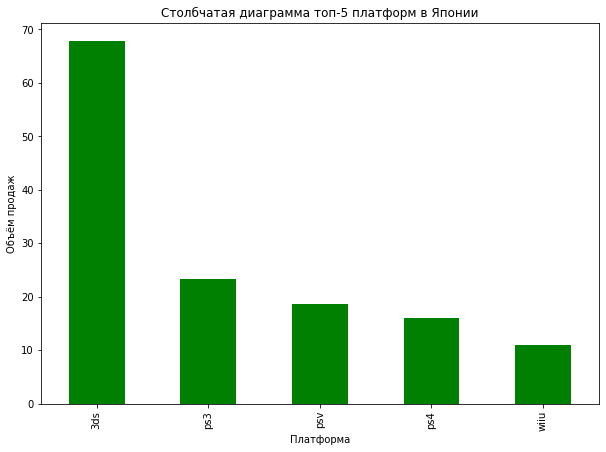

,jp_sales,percent
platform,,
3ds,67.810000,0.481674
ps3,23.350000,0.165862
psv,18.590000,0.132050
ps4,15.960000,0.113368
wiiu,10.880000,0.077284


In [127]:
most_popular_platform_jp = data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index().head(5)
most_popular_platform_jp.set_index('platform', inplace=True)
most_popular_platform_jp.plot.bar(legend=False, color='green', figsize=(10, 7))
plt.xlabel('Платформа')
plt.ylabel('Объём продаж')
plt.title('Столбчатая диаграмма топ-5 платформ в Японии')
plt.show()
total_jp_sales = data['jp_sales'].sum()
most_popular_platform_jp['percent'] = most_popular_platform_jp['jp_sales'] / total_jp_sales
most_popular_platform_jp.style.background_gradient('viridis')

Различия в размещений платформ в таблицах рейтинга зависят от многих фактов: цены, уровень успеха рекламной компании и т.д. Заметим вот что: все регионы сильно любят PlayStation. В Северной Америке PlayStation 4/3 занимают 1-е и 4-е место. В Европе PlayStation 4/3 занимают 1-е и 2-е места. В Японии 2 из 4-и позиций в рейтинге также забирают платформы PlayStation.

Самые популярные жанры (топ-5). Поясните разницу.

Построим графики(barplots) для составления рейтинга топ-5 жанров по продажам:

Популярные жанры в Северной Америке:

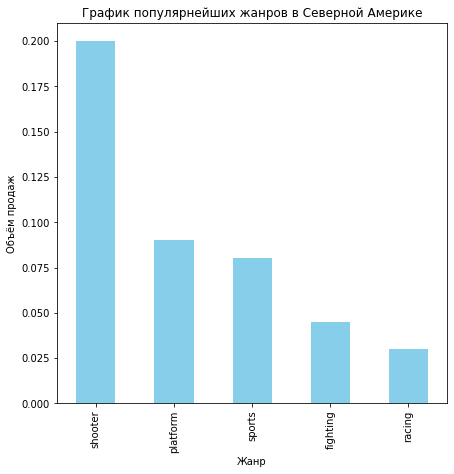

In [128]:
genre_pt_na = data.pivot_table(index='genre', values='na_sales', aggfunc='median').sort_values(by='na_sales', ascending=False).head(5)

genre_pt_na.plot(kind='bar', color='skyblue', figsize=(7, 7), legend=False)
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.title('График популярнейших жанров в Северной Америке')
plt.show()

Популярные жанры в Европе:

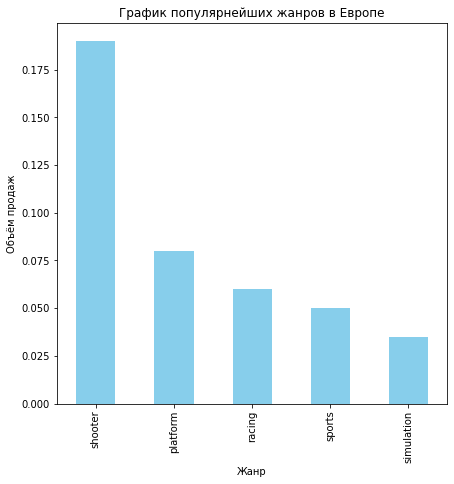

In [129]:
genre_pt_eu = data.pivot_table(index='genre', values='eu_sales', aggfunc='median').sort_values(by='eu_sales', ascending=False).head(5)

genre_pt_eu.plot(kind='bar', color='skyblue', figsize=(7, 7), legend=False)
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.title('График популярнейших жанров в Европе')
plt.show()

Популярные жанры в Японии:

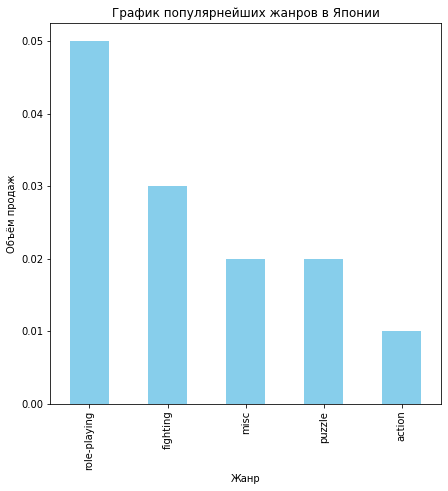

In [130]:
genre_pt_jp = data.pivot_table(index='genre', values='jp_sales', aggfunc='median').sort_values(by='jp_sales', ascending=False).head(5)

genre_pt_jp.plot(kind='bar', color='skyblue', figsize=(7, 7), legend=False)
plt.xlabel('Жанр')
plt.ylabel('Объём продаж')
plt.title('График популярнейших жанров в Японии')
plt.show()

В предпочтнении жанров Северная Америка и Европа схожи(1-ая и 2-е позиции схожи даже по рейтингу, 4 из 5 позиций есть в обоих топах), а вот Япония сильно отличается предпочтениями жанров: допустим жанр шутер в топ-5 жанрах Японии даже не фигурирует, когда в Северной Америке и Европе он занимает 1-е место.

Предпочтения в жанрах видеоигр могут сильно различаться в разных регионах по нескольким причинам: 

- Культурные особенности;
- Демография;
- Работа местных разработчиков;
- Исторические факторы.

Некоторые жанры могут быть связаны с определенными историческими событиями или традициями определенного региона. Например, в Японии игры жанра JRPG (японские ролевые игры) очень популярны из-за их исторической связи с японской культурой.Шутеры про Вторую мировую в Японии не популярны в силу очевидных исторических причин. Для вошедшей в состав нацистской коалиции Японии эта война закончилась сокрушительным поражением, атомной бомбардировкой и запретом иметь собственную армию. Вообщем если есть идея делать проект под какой-то конкретный регион, то нужно знакомиться со спецификой данного региона более глубоко.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Влияние рейтинга ESRB на продажи в Северное Америке:

![image.png](воз_рейтинг.jpg)

У нас категориальный столбец с жанрами, а значит диаграмму рассеяния нам не построить. Построим барплоты, посмотрим на разницу в объёмах продаж и определим является ли зависимость продаж от рейтинга линейной, т. е. располагаются ли объёмы в такой же последовательности как на выдержке сверху.

Влияние рейтинга ESRB на продажи в Северное Америке:

Сразу нужно принять во внимание что не в каждом регионе присутствует данный рейтинг и именно поэтому так много игр с неопределённым рейтингом.

In [131]:
rating_pt_na = data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating_pt_na.style.background_gradient('RdYlGn')

,na_sales
rating,
m,165.270000
is not defined,89.420000
e,79.050000
e10+,54.240000
t,49.790000


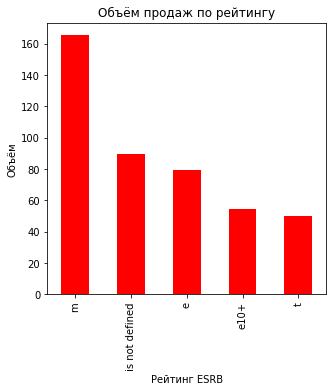

In [132]:
rating_pt_na.plot(kind='bar', color='red', figsize=(5, 5), legend=False)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объём')
plt.title('Объём продаж по рейтингу')
plt.show()

Влияние рейтинга ESRB на продажи в Европе: линейной зависимости объёма продаж от рейтинга не наблюдается. Наиболее популярные категории рейтинга ESRB: M - 1 место(старше 17-и лет), E  - 2 место(для лиц старше 13-и лет), E10+ - 3-е(старше 10-и лет).Нужно учесть что для множество игр рейтинговая категория вовсе не определена: её не существует в ряде стран.

Влияние рейтинга ESRB на продажи в Европе:

In [133]:
rating_pt_eu = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
rating_pt_eu.style.background_gradient('RdYlGn')

,eu_sales
rating,
m,145.570000
e,83.360000
is not defined,78.910000
e10+,42.690000
t,41.950000


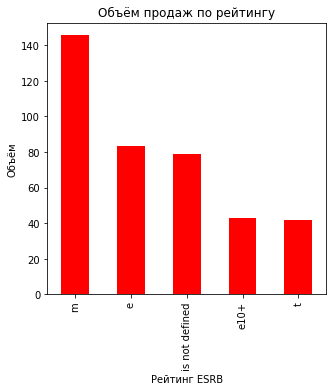

In [134]:
rating_pt_eu.plot(kind='bar', color='red', figsize=(5, 5), legend=False)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объём')
plt.title('Объём продаж по рейтингу')
plt.show()

Влияние рейтинга ESRB на продажи в Европе: линейной зависимости объёма продаж от рейтинга не наблюдается. Наиболее популярные категории рейтинга ESRB: M - 1 место(старше 17-и лет), E - 2 место(для лиц старше 13-и лет), E10+ - 3-е(старше 10-и лет) и т.д..Нужно учесть что для множества стран данного рейтинга не существует .

Влияние рейтинга ESRB на продажи в Японии:

In [135]:
rating_pt_jp = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
rating_pt_jp.style.background_gradient('RdYlGn')

,jp_sales
rating,
is not defined,85.050000
t,20.590000
e,15.140000
m,14.110000
e10+,5.890000


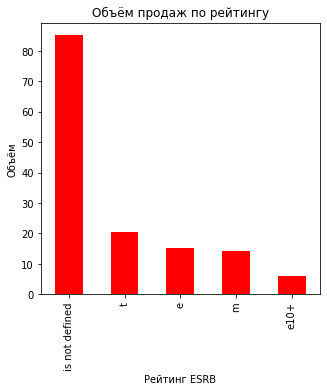

In [136]:
rating_pt_jp.plot(kind='bar', color='red', figsize=(5, 5), legend=False)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Объём')
plt.title('Объём продаж по рейтингу')
plt.show()

Влияние рейтинга ESRB на продажи в Японии: большинство игр не имеет данного рейтинга, скорее всего остальные релизы были изначально выпущены в странах где присутствует такой рейтинг, но их меньше половины.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Вот такая проблема была с рейтингом. <br>
А дело в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. А в Японии есть свой рейтинг, свой рейтинг есть в ЕС и отдельно в Германии, Австралии и т.д., но по ним в датасете нет данных. То есть, в данном случае пропуск имеет признак, что игра выпущена не в Северо-Американском регионе. Необходимо шире смотреть на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. Это необходимо учитывать при предобработке данных.</font>

Портреты пользователей каждого региона(Северная Америка, Европа, Япония):

Северная Америка:

Типичный игрок Северной Америки предпочитает следующие жанры игр: шутер, платформер, спорт, сражения, гонки. Самые типичные платформы для него - это представители семейста Xbox и PlayStation, а также Nintendo ds 3: ps3, ps4, xOne, x360, 3ds. Самый распростанённый рейтинг ESRB - M(страше 17-и лет) и он актуален для данного региона.

Европа:

Типичный игрок Европы предпочитает следующие жанры игр: шутер, платформер, спорт, симулятор, гонки. Самые типичные платформы для него - это представители семейста Xbox и PlayStation, а также Nintendo ds 3: ps3, ps4, xOne, x360, 3ds. Находить типичный рейтинг ESRB не корректно для данного региона.

Япония:

Типичный игрок Японии предпочитает следующие жанры игр: ролевые, сражения, миск, пазлы, экшен. Самые типичные платформы для него - это представители семейста PlayStation, а также Nintendo ds 3: ps3, ps4, wiiu, psv, 3ds. Находить типичный рейтинг ESRB не корректно для данного региона: у Японии свой возрастной рейтинг который не указан в датафрейме.CERO — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт.

#### Проверьте гипотезы: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Задайте самостоятельно пороговое значение alpha.
Поясните:*

- Как вы сформулировали нулевую и альтернативную гипотезы;

- Какой критерий применили для проверки гипотез и почему.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Проверим гипотезу о равенстве средних пользовательских рейтингов двух выборок, которые отличаются платформами(Xbox One и PC) следующим образом: H0: среднее значение пользовательских оценок платформы Xbox One равно среднему значению пользовательских оценок платформы PC, H1: среднее значение пользовательских оценок платформы Xbox One НЕ равно среднему значению пользовательских оценок платформы PC(двустороняя альтернативная гипотеза: alternative='two-sided' т.е. двустороняя). Т.к. у нас сравниваются средние значение 2-х выборок, то воспользуемся методом ttest_ind:

In [137]:
# Запишем выборки в переменных
df_user_score_xone = data.query('(platform == "xone") & (user_score != -1)')['user_score']
df_user_score_pc = data.query('(platform == "pc") & (user_score != -1)')['user_score']
    
alpha = .05

results = st.ttest_ind(df_user_score_xone, df_user_score_pc, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.16390354211387628
Нет оснований отвергнуть нулевую гипотезу


Получилось  высокое  p-значения, что указывает на то, что существует очень значительная вероятность получить такие или более экстремальные результаты. Мы НЕ отвергли нулевую гипотезу о равенстве 2-х средних, значит всё же среднее значение пользовательских оценок на указанных платформах наших выборок вполне вероятно  НЕ различаются.

Посмотрим на средние значения этих выборок:

In [139]:
print(f'{df_user_score_xone.mean()} - среднее значение пользовательских рейтингов Xbox ONE')
print(f'{df_user_score_pc.mean()} - среднее значение пользовательских рейтингов PC')

6.521428571428572 - среднее значение пользовательских рейтингов Xbox ONE
6.283974358974358 - среднее значение пользовательских рейтингов PC


Дополнительно повышаем уверенность в корректности проверки нашей гипотезы: средние значения выборок примерно равны.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу о равенстве средних пользовательских рейтингов двух выборок, которые отличаются жанрами(Action и Sports) следующим образом: H0: среднее значение пользовательских оценок жанра Action равно среднему значению пользовательских оценок жанра Sports, H1: среднее значение пользовательских оценок жанра Action НЕ равно среднему значению пользовательских оценок жанра Sports(двустороняя альтернативная гипотеза: alternative='two-sided' т.е. двустороняя). Т.к. у нас сравниваются средние значение 2-х выборок, то воспользуемся методом ttest_ind:

In [140]:
# Запишем выборки в переменных
df_user_score_actoin = data.query('(genre == "action") & (user_score != -1)')['user_score']
df_user_score_sports = data.query('(genre == "sports") & (user_score != -1)')['user_score']
    
alpha = .05

results = st.ttest_ind(df_user_score_actoin, df_user_score_sports, alternative='two-sided')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 7.68963684307543e-28
Отвергаем нулевую гипотезу


Получилось  маленькое  p-значения, что указывает на то, что существует очень низкая вероятность получить такие или более экстремальные результаты, если бы нулевая гипотеза была верна. Мы отвергли нулевую гипотезу о равенстве 2-х средних, значит всё же среднее наших выборок различаются: средние пользовательские оценки двух выборок(по жанрам) вероятно отличаются.

Посмотрим на средние значения этих выборок:

In [142]:
print(f'{df_user_score_actoin.mean()} - среднее значение пользовательских рейтингов жанра экшен')
print(f'{df_user_score_sports.mean()} - среднее значение пользовательских рейтингов жанра спорт')

6.841794871794871 - среднее значение пользовательских рейтингов жанра экшен
5.238124999999999 - среднее значение пользовательских рейтингов жанра спорт


Дополнительно повышаем уверенность в корректности проверки нашей гипотезы: среднее действительно довольно отличны друг от друга.

#### Подведение итогов работы: поиск и конкретизация закономерностей определяющих успешность игры:

- Обзор данных.

После первичного ознакомление с датасетом однозначно было установлено, что набор данных имеет  некоторые проблемы: не все атрибуты имеют корректный тип данных(из-за этого для столбца 'User_Score' нельзя расчитать описательные статистики), не все пункты оформления по единому стилю соблюдены(разные регистры), имеются пропуски. Распределения числовых атрибутов вполне адекватные. Объём для предобработки был не особо велик: нужно было поработать с дубликатами(явными/неявными), поработать с пропусками, подправить названия атрибутов согласно правил единого стиля, поменять тип данных в некоторых столбцах и добавить конкретизующие столбцы(опционально), посмотреть зависимости столбцов.

- Подготовка данных/Предобработка данных.

Нам удалось получить больше понимание о наших данных(узнали временной диапозон сбора данных, узнали о рейтинге ESRB, узнали о корреляции некоторых столбцов и т.д.), избавиться от некоторого количества ошибочных(аномальных) записей, немного восстановить пропуски в датасете, проверить наличие и устранить(при наличии) неявные дубликаты, проверить наличие явных дубликатов, внести больше конкретики и понимания для каждого столбца датафрейма и подкорректировать типы данных.

- Исследовательский анализ данных.

Пиковое количество релизов приходится на 2008-й год, за ним идёт 2009, 2010, 2011 и т.д.. Интересно что только с 1993-го года объём релизов начал расти: видимо люди до этого времени не были заинтересованы в создании и выпуске игр. Объёмы выпуска с 1994-го года увеличились почти в 2 раза. Опираясь на данные графики можно сказать что 1994-й год стал отправной точкой в геймдеве. Важны ли данные за все периоды? Чем больше выборка, чем она репрезентативнее: если есть возможность взять выборку побольше, то берём выборку больше. Но определённо 'ценность' данных после 1994-го года(или даже после 2001-го) гораздо выше чем до 1994-го, т.к. объёмы выпуска после 1994-го в разы больше(в основном) чем до 1994-го. После 2000-го года объёмы релизов начинают расти ещё стремительнее: таким образом самые 'ценные' данные наблюдаются после 2000-го года, ведь после 2000-го объёмы гораздо выше. После 2010-го года наблюдается спад релизов вплоть до 2016-й. Причины спада могут быть разными и наверное даже комплексными: развитие мобильного гейминга, циклический спад желания инвесторов вкладывать в разработку новых проектов и другие.

Выход новых платформ весьма хаотичный во всём разбросе данных. Визуально на графике сложно сделать конструктивный вывод. Поступим следующим образом: найдём год появления платформы(минимальная дата релиза на платформе), потом найдём следующую очередную дату и вычтем одну из другой, таким образом у нас получится будет ряд чисел. Из этого ряда определим медиану - это и будет характеристикой того как часто выходят новые платформы.

Успешные платформы появляются примерно раз в 3 году, любые(успешные/неуспешные) платформы появляются примерно раз в год. Будем считать что новые платформы появляются в диапозоне от года до трёх.

Актуальные года наблюдаются с 2013-го по 2016-й год, т.к. много данных лежит в этом диапозоне и именно этот диапозон содержит актуальные тренды игроиндустрии.

Как обычно бывает стабильные варианты имеют средний доход, а вот нестабильные варианты имеют потенциал к высокому доходу. Для игроиндустрии характерно быстросменяющееся тренды(в жанрах, платформах и т.д.), поэтому вариантвов нестабильных больше, но и выручка значительнее. Исходя из графиков и таблицы рейтинга выделяем следующие платформы как хороший вариант для старта(или продолжения) выпуска игр:

- стабильные:

в актульном периоде нет таких, если бы мы взяли все периоды, то таким вариантом служил бы ПК, т.к. на него наиболее стабильно выпускают игры, причиной этому - железо. В ПК обновляются компоненты, но платформа не меняется, что не скажешь про другие проекты.

- нестабильные(на долгий период, но потенциально очень прибыльные на актуальный):

"ps4": 1-ая позиция рейтинга за актуальный период (7-я строчка рейтинга в продажах за всё время). У PlayStation 4 Потолок продаж ещё не достигнут, за плечами компании уже имеется ряд успешных платформ(PlayStation 1 - PlayStation 3), риск существует, но больше выражается в том что компания выпустит следующую платформу(сильный провал PlayStation 4 без выхода новой платформы маловероятен).

"xone": 3-я позиция рейтинга за актуальный период(17-я строчка рейтинга в продажах за всё время). У  Xbox One Потолок продаж ещё не достигнут. За плечами компании есть один успешный проект(Xbox 360 который занимает 2-ую строчку рейтинга в продажах за всё время), риск существует, но больше выражается в том что компания выпустит следующую платформу или возникнут сильные конкуренты.

Опираясь на 3 графика рейтинга можем однозначно сказать, что если оптимально подобрать жанр для создания игр, то можно заработать гораздо гораздо больше: выбор оптимального жанра существенно влияет на рентабельность проекта, дифференциация в объёмах продаж колоссально значительна(цвета на таблицах рейтинга отличаются явно/графики также это подтверждают). Жанры с высокими объёмами продаж выделяются из общей массы гораздо сильнее чем жанры с самыми низкими объёмами(популярнейшие жанры сильнее отклоняются от центральной тенденции чем жанры с наименьшей популярностью).

Результируем пункт и находим оптимальные жанры: Прежде чем определяться с жанром игры, лучше сразу обдумать под какую платформу мы будем её выпускать и провести дополнительное исследования, опираясь на наше: так потенциально возможно заработать больше, ведь какой-то жанр может очень хорошо себя показывать на одной платформе, а на другой плохо(больше аналитики - меньше риски). Если дополнительное исследование не выгодно или на это нету времни, то согласно нашему исследованию получаем вот такие потенциально хорошие варианты для выпуска игр(они прибыльны и довольно стабильны):

- шутер: самое высокое медианное значение и совсем нету выбросов сверху, что демонстрирует хорошую надёжность, по суммарным продажам занимает 2-е место среди всех(почти лидер по продажам и при этом более менее безопасен), по объёму выпуска занимает 5-е место, также замечательно: на рынке нету избытка этого жанра(пользователей будет не так сложно удивить) и при этом есть хорошие и продаваемые представители этого жанра: можно взглянуть на лучшие релизы  и выделить для нашего проекта некие преимущества и чему-то поучиться.

- спорт: 2-й по рейтингу медиан(немного выбросов сверху), 4-й по выпуску релизов, 3-ий по суммарным продажам: имеет такие же преимущетсва как и жанр шутер, но при этом немного проигрывает ему.

- платформер: немного иная ситуация. По медианным продажам этот жанр силён - 3-е место(при этом выбросов немного, но больше чем в жанрах выше). Рекорды по суммарным продажам не такие впечатлительные(6-е место). Но вот что делает данный жанр очень неплохой альтернативой: количество выпускаемых игр -  их мало(9-е место в рейтинге). Что это значит? Игрокам интересен этот жанр: высокие медианные продажи при том что релизов маловато говорят об этом. Если у Вас есть хороший запас мощностей, креатива и желания сделать по-настоящему прорывной релиз в этом жанре, то есть хорошая возможность заработать.

- Составление портрета пользователя каждого региона.

Портреты пользователей каждого региона(Северная Америка, Европа, Япония):

Северная Америка:

Типичный игрок Северной Америки предпочитает следующие жанры игр: шутер, платформер, спорт, сражения, гонки. Самые типичные платформы для него - это представители семейста Xbox и PlayStation, а также Nintendo ds 3: ps3, ps4, xOne, x360, 3ds. Самый распростанённый рейтинг ESRB - M(страше 17-и лет) и он актуален для данного региона.

Европа:

Типичный игрок Европы предпочитает следующие жанры игр: шутер, платформер, спорт, симулятор, гонки. Самые типичные платформы для него - это представители семейста Xbox и PlayStation, а также Nintendo ds 3: ps3, ps4, xOne, x360, 3ds. Находить типичный рейтинг ESRB не корректно для данного региона.

Япония:

Типичный игрок Японии предпочитает следующие жанры игр: ролевые, сражения, миск, пазлы, экшен. Самые типичные платформы для него - это представители семейста PlayStation, а также Nintendo ds 3: ps3, ps4, wiiu, psv, 3ds. Находить типичный рейтинг ESRB не корректно для данного региона: у Японии свой возрастной рейтинг который не указан в датафрейме.CERO — японская некоммерческая организация, занимающаяся присуждением рейтингов компьютерным играм и программному обеспечению для их последующей продажи на территории Японии. Рейтинг, в частности, указывает потребителю на возрастную группу, категорию людей, которые могут использовать данный продукт.

- Проверка гипотез.

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:  Мы не отвергли нулевую гипотезу о равенстве 2-х средних, значит всё же среднее значение пользовательских оценок на указанных платформах наших выборок вполне вероятно не различаются.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные: мы отвергли нулевую гипотезу о равенстве 2-х средних, значит всё же среднее наших выборок различаются: средние пользовательские оценки двух выборок(по жанрам) вероятно отличаются.

- Подведение итогов работы: поиск и конкретизация закономерностей определяющих успешность игры.

**Кокретизация/точки роста**: Если вы планируете выпуск новых релизов, то нужно понимать что примерно каждые 1-3 года выходит какая-то новая платформа, поэтому стоит присмотреться на существующие платформы: 1-3 года может не быть новой платформы и при этом неизвестно долго ли будет жить новый проект и будет ли он вообще успешен. Средние пользовательские оценки различных платформ и жанров имеют дифференциацию. Рынок на 2016-й год терпит спад, но при этом существуют  выгодные платформы для старта выпуска новых игр. Из рейтинга жанров следует что популярными являются динамичные жанры в основе, а их специфика зависит от конкретного региона. От жанра, платформы, региона может координально сильно зависеть успех игры. Оценки критиков имеют связь с общими продажами, но довольно слабую, поэтому опираться первоочерёдно на них не стоит. Пользовательские оценки вообще в большинстве случаев имеют околонулевую корреляцию с продажами. Рейтинг ESRB устанавливается только для США, Канады и Мексики, поэтому при создании проекта под какой-либо регион(страну) необходимо опираться на локальные возрастные рейтинговые образцы. Если ориентироваться на Мировой рынок, то потенциально самыми выигрышными платформами на 2017-й год являются представитель серии PlayStation:  PlayStation 4, а также Xbox ONE. Самыми популярными жанрами являются шутер(в 2-х регионах топ-1 по популярности), спорт, платформер. Если проект будет создаваться под конкретный регион, то лучше внимательнее ознакомиться со спецификой данного региона и провести дополнительное исследование при возможности.